### Problem 2 for the Data Set SoftDrink.csv

You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.



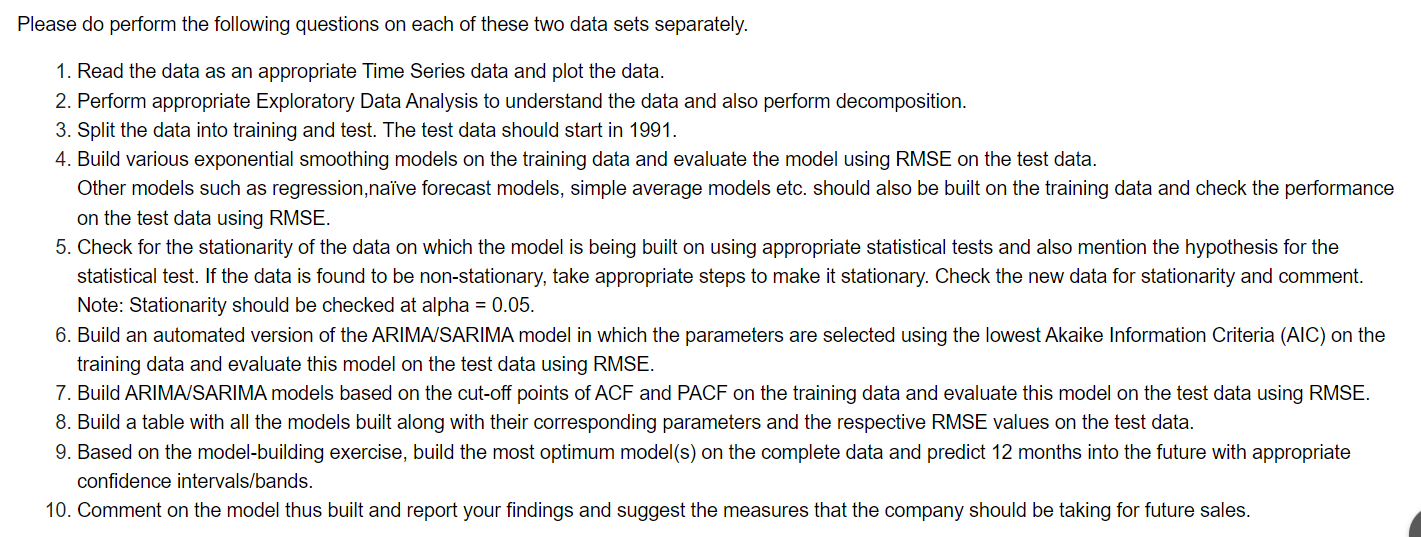

In [1]:
# Import the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

### 1.Read the data as an appropriate Time Series data and plot the data.

In [3]:
df1 = pd.read_csv('SoftDrink.csv') # Reading the data
df1.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [4]:
df1.tail()

YearMonth  SoftDrinkProduction
182   1995-03                 4067
183   1995-04                 4022
184   1995-05                 3937
185   1995-06                 4365
186   1995-07                 4290

In [5]:
df1.shape

(187, 2)

In [6]:
df1.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

Here we can see that the YearMonth is showing as 'object' variable. we need to convert this data into time series data by parsing the date column and making it as index.

The Time series is having monthly series.

In [7]:
df = pd.read_csv('SoftDrink.csv',parse_dates=['YearMonth'],index_col='YearMonth')
df.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [8]:
df.tail()

SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [9]:
#The data is converted into time series data.

In [10]:
from pylab import rcParams

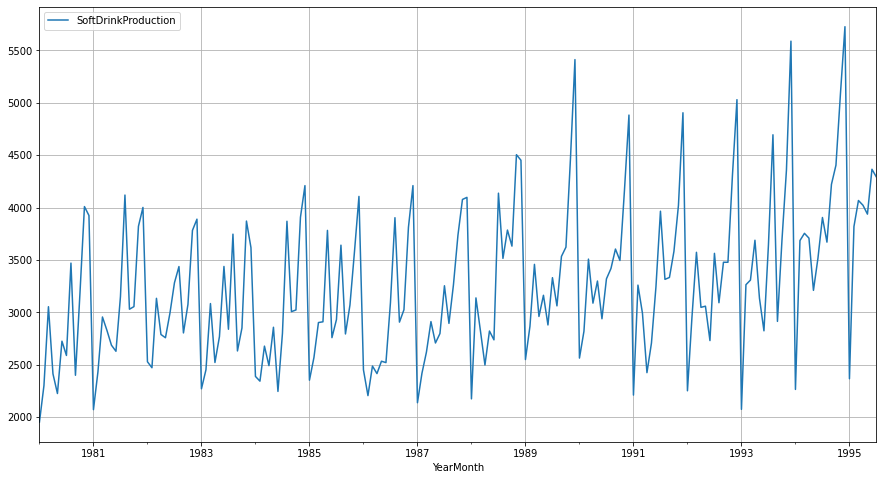

In [11]:
# Timeseries plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()
#plt.savefig('ts1.png')

***Time series plots can help us spot time-dependent patterns in the data values, such as increasing or decreasing trends, changes in the mean or variability over time.***

* Time series plots help us look for repeating patterns such as cycles or seasonal fluctuations.

* Time series data has four aspects of behaviour: Trend, Seasonality, Cycles & Unexplained Variation.

* Trend is the overall long time direction of the series..

* Seasonality occurs when there is repeated behaviour in the data which occurs at regular intervals. It is related to seasonal natural or human behaviour.

From the above time series plot we can see that both the trend and seasonality.

The plot clearly shows that the series is of multiplicative model.

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
df.info() #Checking info of the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


we can see the index as DatetimeIndex and variable SoftDrinkproduction of int64 datatype.

In [13]:
df.shape #Shape of the data

(187, 1)

The number of rows = 187

The number of columns = 1

In [14]:
df.isnull().sum() #Checking null values

SoftDrinkProduction    0
dtype: int64

There are no null values present on the dataset.

In [15]:
df.describe().T #Description of the data

count         mean         std     min     25%     50%  \
SoftDrinkProduction  187.0  3262.609626  728.357367  1954.0  2748.0  3134.0   

                        75%     max  
SoftDrinkProduction  3741.0  5725.0

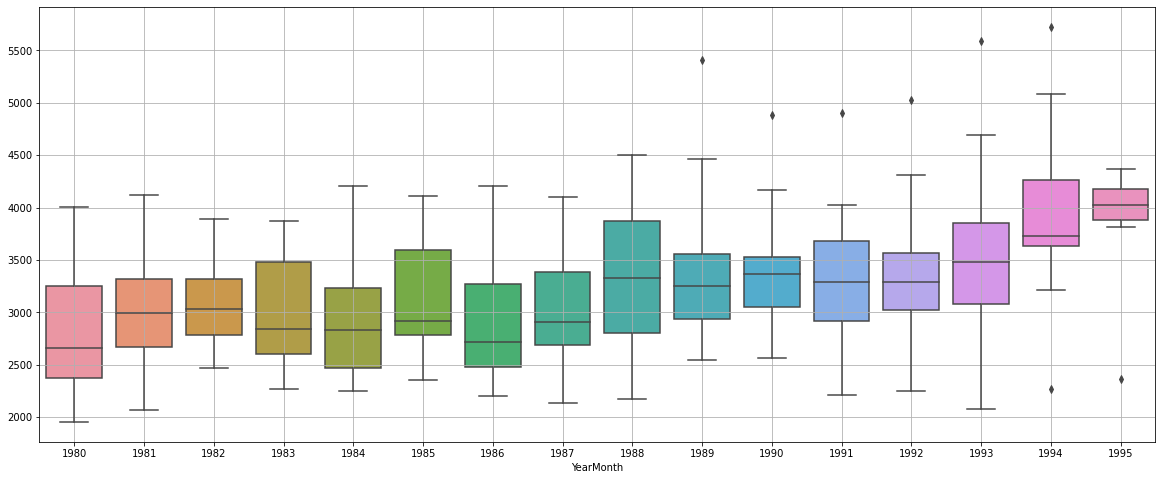

In [16]:
#Boxplot for Years
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
#plt.savefig('yearly boxplot.png')

From the Yearly boxplot, we can see the trend, Seasonality and the outliers present in the data from 1989 to 1995.

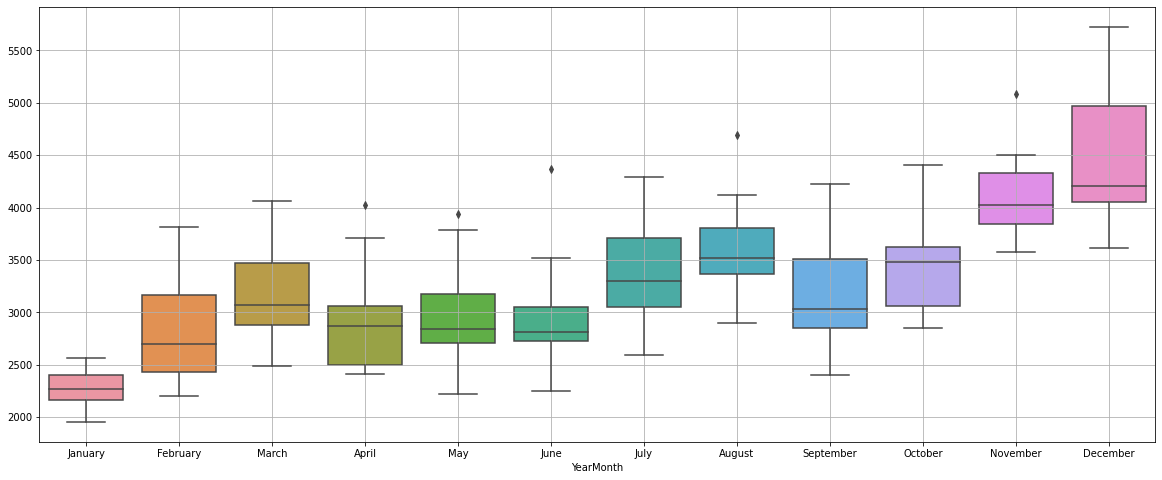

In [17]:
#Boxplot for Months
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();
#plt.savefig('Monthly boxplot.png')

We can observe the slight spike & drop of trend in the monthly boxplot and there are less number of outliers present in monthly series data.

- Outliers are present only in April, May, June, August, November months.
- We can observe the spike of sales from september to December.
- The December month is having the highest spike of sales every year.

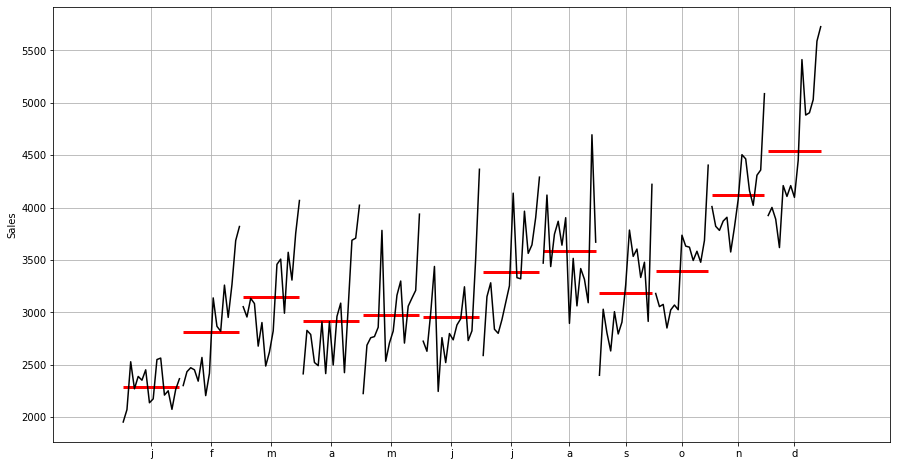

In [18]:
#Plotting a time series monthplot to understand the spread of Sales across 
#different years and within different months across years.

from statsmodels.graphics.tsaplots import month_plot

month_plot(df['SoftDrinkProduction'],ylabel='Sales')
plt.grid();
#plt.savefig('tsm plot.png')

From the above discrete time series plot, we can understand the behaviour of the time series data through the median which is represented as *red line*.

The median is varying for each month.

In [19]:
# Plot a time series monthplot to understand the spread of Sales across different years
# and within different months across years
monthly_sales_across_years = pd.pivot_table(df, values = 'SoftDrinkProduction', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981       2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982       2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983       2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984       2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985       2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986       2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987       2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988       2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989       2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990       2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991       2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992       2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993       2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994       2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995       2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       2400.0  3180.0  4009.0  3924.0  
1981       3030.0  3055.0  3821.0  4001.0  
1982       2804.0  3076.0  3782.0  3889.0  
1983       2632.0  2851.0  3871.0  3618.0  
1984       3007.0  3023.0  3907.0  4209.0  
1985       2794.0  3070.0  3576.0  4106.0  
1986       2907.0  3025.0  3812.0  4209.0  
1987       3263.0  3736.0  4077.0  4097.0  
1988       3785.0  3632.0  4504.0  4451.0  
1989       3534.0  3622.0  4464.0  5411.0  
1990       3604.0  3495.0  4163.0  4882.0  
1991       3333.0  3583.0  4021.0  4904.0  
1992       3478.0  3478.0  4308.0  5029.0  
1993       2914.0  3686.0  4358.0  5587.0  
1994       4221.0  4404.0  5086.0  5725.0  
1995          NaN     NaN     NaN     NaN

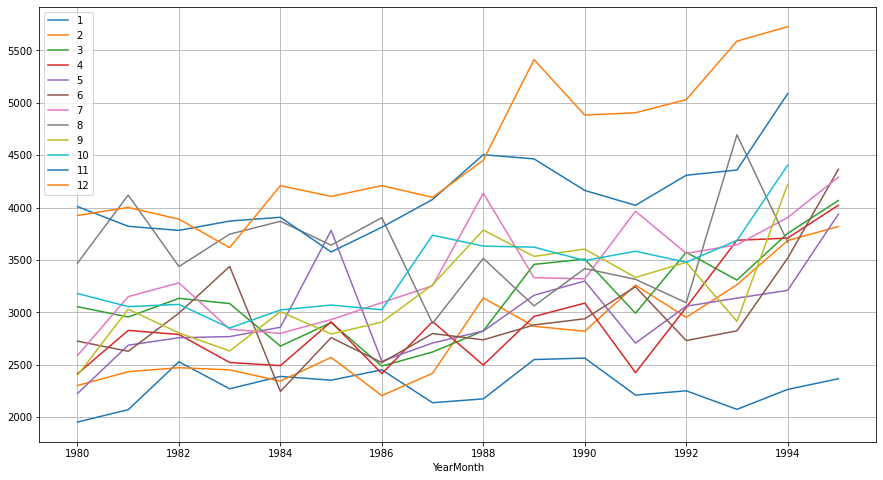

In [20]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
#plt.savefig('tsm plot2.png')

The above line plot shoes the monthly sales performance of SoftDrinkProduction across every year. Generally, November and december months are having the highest sales compared to others. The SoftDrinkProduction are higest and almost in peak stage in the year 1994. December month is having the huge spike of sales in 1989 & 1994. Also, for november month we can see the highest peak sales in 1988 and 1994.

### Read this monthly data into a quarterly and yearly format. Compare the time series plot and draw inferences.

In [21]:
#yearly_plots
df_yearly_sales_sum = df.resample('A').sum()
df_yearly_sales_sum.head()

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1981-12-31                36782
1982-12-31                36945
1983-12-31                36093
1984-12-31                35822

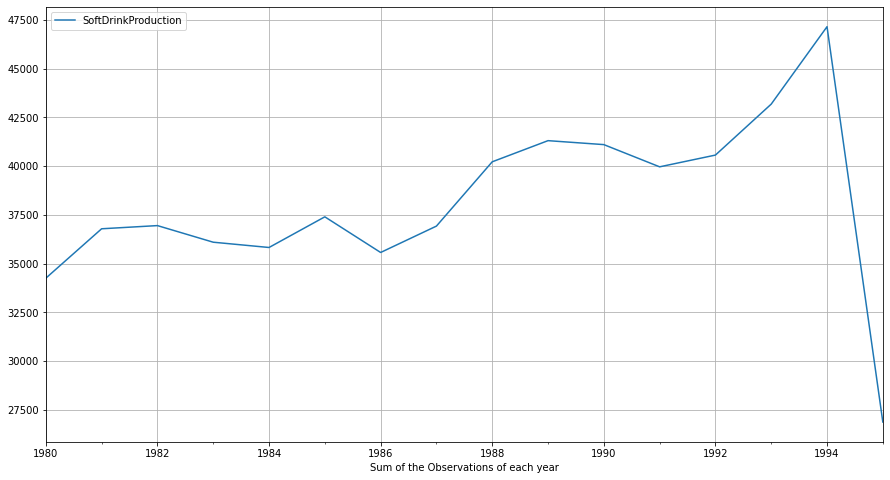

In [22]:
df_yearly_sales_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

From the above plot, we can observe there is seasonality and trend. The sales across years for all the months are dispalyed in the graph. we can obseve a clear highest spike from 1991 to 1994. Also, the year 1994 has the highest peak point in sales. After that we can see the sudden fall in the sales.

In [23]:
df_yearly_sales_mean = df.resample('Y').mean()
df_yearly_sales_mean.head()

SoftDrinkProduction
YearMonth                      
1980-12-31          2853.916667
1981-12-31          3065.166667
1982-12-31          3078.750000
1983-12-31          3007.750000
1984-12-31          2985.166667

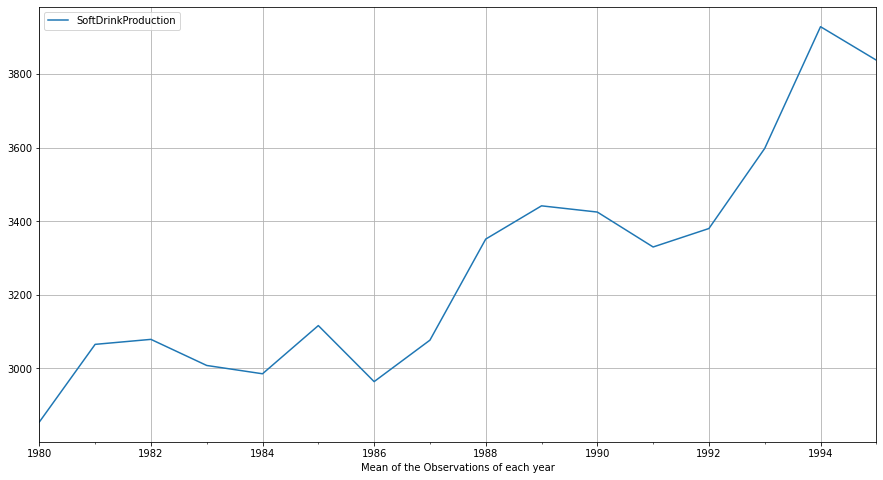

In [24]:
df_yearly_sales_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

From the above plot, we can observe the trend, seasonality and the average sales across each year.

In [25]:
#Quarterly Plots
df_quarterly_sales_sum = df.resample('Q').sum()
df_quarterly_sales_sum.head()

SoftDrinkProduction
YearMonth                      
1980-03-31                 7310
1980-06-30                 7365
1980-09-30                 8459
1980-12-31                11113
1981-03-31                 7462

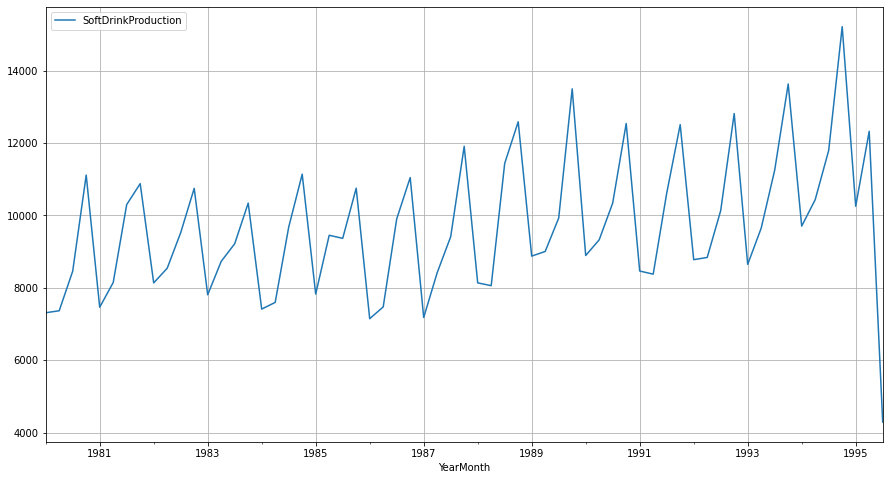

In [26]:
df_quarterly_sales_sum.plot();
plt.grid()

In [27]:
df_quarterly_sales_mean = df.resample('Q').mean()
df_quarterly_sales_mean.head()

SoftDrinkProduction
YearMonth                      
1980-03-31          2436.666667
1980-06-30          2455.000000
1980-09-30          2819.666667
1980-12-31          3704.333333
1981-03-31          2487.333333

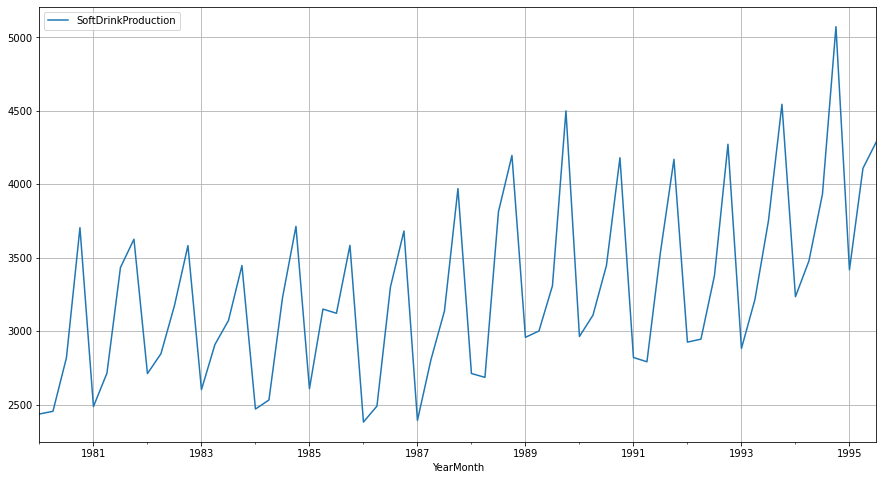

In [28]:
df_quarterly_sales_mean.plot();
plt.grid()

From the above Quartely plots, we can see the slight smoothening of the curve. The trend and seasonality are also clearly visible. Both the sum and average sales plots are almost same.

In [29]:
#Daily Plots
df_daily_sales_sum = df.resample('D').sum()
df_daily_sales_sum

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-01-02                    0
1980-01-03                    0
1980-01-04                    0
1980-01-05                    0
...                         ...
1995-06-27                    0
1995-06-28                    0
1995-06-29                    0
1995-06-30                    0
1995-07-01                 4290

[5661 rows x 1 columns]

In [30]:
#If the data is resampled on daily basis, the values which the original series can not provide is taken as 0 by python

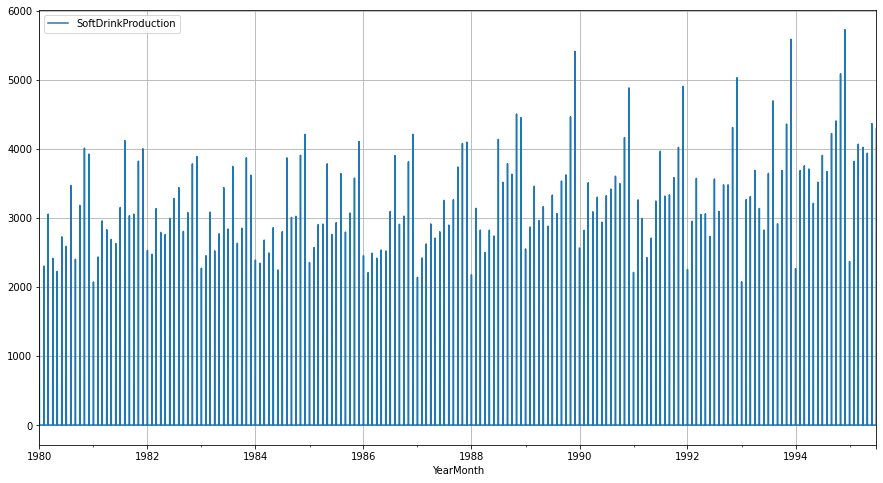

In [31]:
df_daily_sales_sum.plot()
plt.grid();

Resampling the data to daily interval where the number of observations are 0 is not a good practise beacause it does not give us clear understanding of the behaviour of the time series.

In [32]:
# Decade plot
df_decade_sales_sum = df.resample('10Y').sum()
df_decade_sales_sum

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1990-12-31               378143
2000-12-31               197718

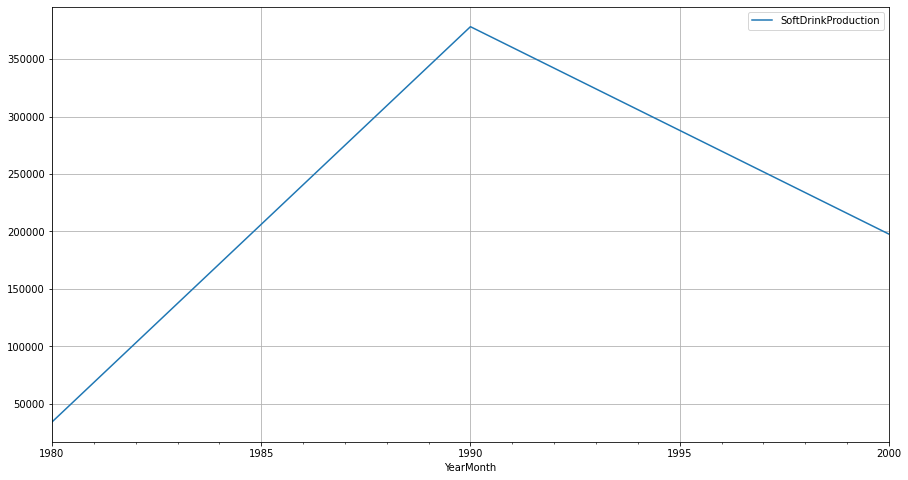

In [33]:
df_decade_sales_sum.plot();
plt.grid()

from the Decade Plot, we observe the smoothened seasonality. But the trend is clearly visisble.

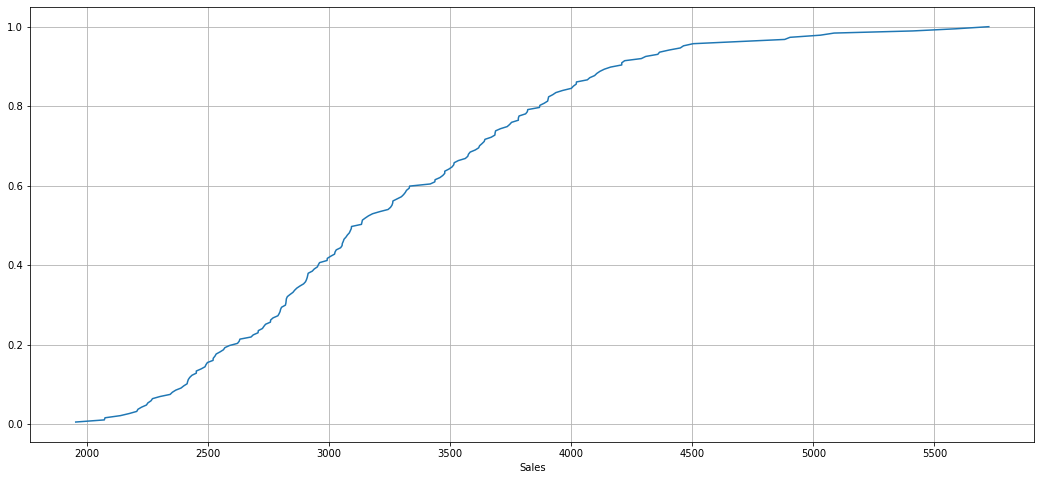

In [34]:
#Empirical Cummulative Distribution Curve

from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['SoftDrinkProduction'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');
#plt.savefig('ECD curve.png')

The Emperical distribution curve shows the overall sales distribution of SoftDrinkProduction.

In [35]:
df['SoftDrinkProduction'].min() #minimum sale value

1954

In [36]:
df['SoftDrinkProduction'].max() #maximum sale value

5725

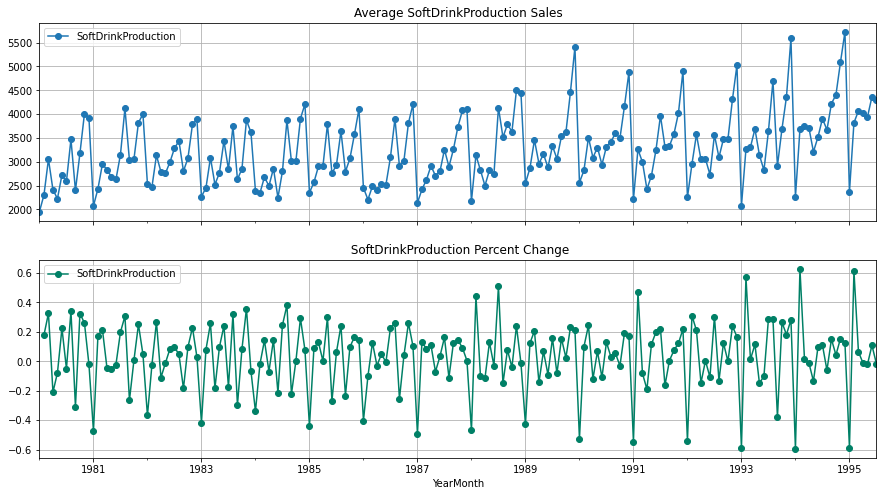

In [37]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales 
#group by date and get average Sales, and precent change

avg    = df.groupby(df.index)["SoftDrinkProduction"].mean()
pct_change = df.groupby(df.index)["SoftDrinkProduction"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='o',title="Average SoftDrinkProduction Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title=" SoftDrinkProduction Percent Change",grid=True)

From the above plot,

we can see the average sales of the soft drink production for every month in a year.

The dots represets the avrage sales of the month.

From the percent change plot of the sales,

we can se that at what percent the sales are increasing or decreasing from month to month.

## Decomposition

Decomposing the the time series data plays an important role in forecasting and improving forecast accuracy.

Seasonal_decompose uses the classical decomposition method. There are two types of decomposition in this.

1. Additive Decomposition: It is a Linear model, The components are added together. i.e., Y = T + S + R.

2. Multiplicative Decomposistion: It's a non linear model. The components are multiplied together. i.e., Y = T * S * R.

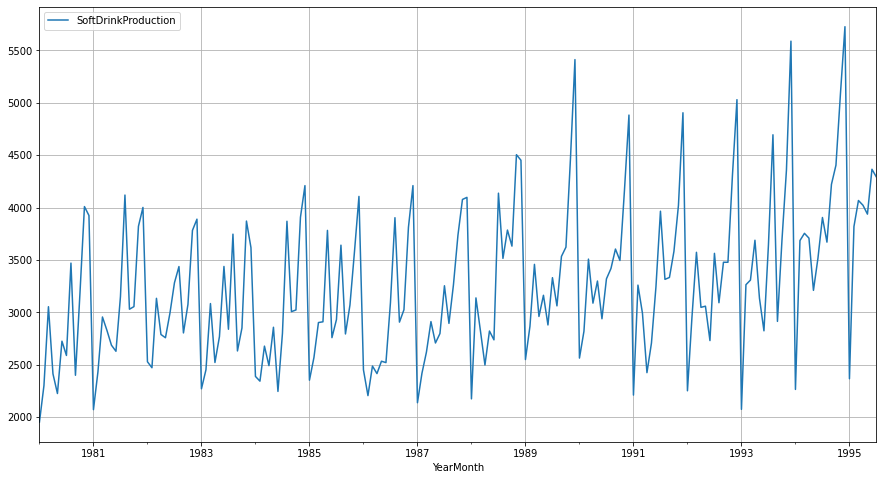

In [38]:
# Timeseries plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

The time series data shows both trend & seasonality.

The plot clearly shows that the series is of multiplicative model.

But, I am doing both the Additive and Multiplicative models to understand the difference between then clearly.

### Additive Decomposition

In [39]:
from statsmodels.tsa.seasonal import   seasonal_decompose

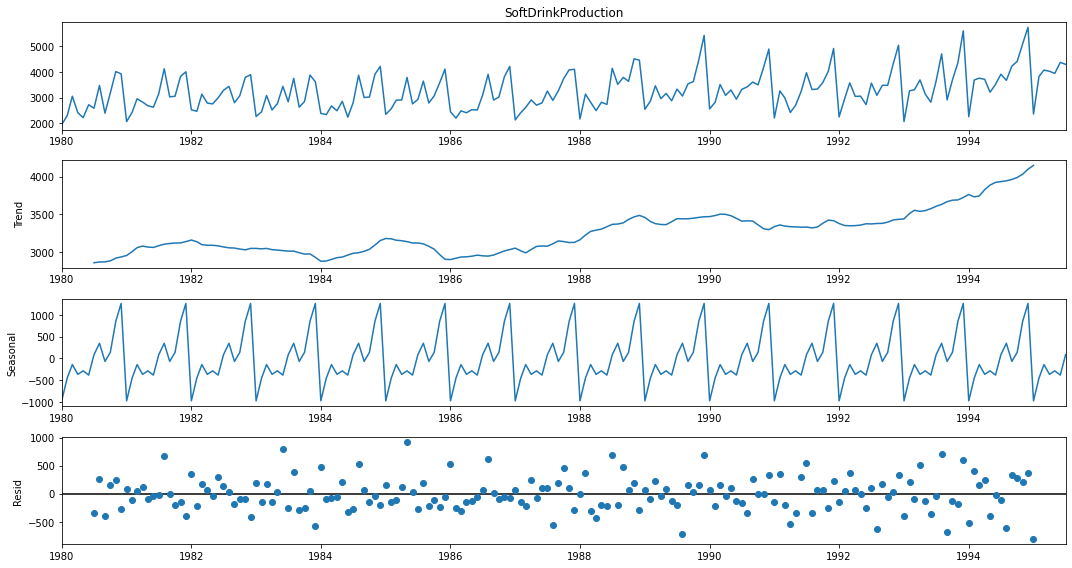

In [40]:
decomposition_a = seasonal_decompose(df['SoftDrinkProduction'],model='additive')
decomposition_a.plot();

From the above decomposition plot, we can see that the time series data is having the trend, seasonality in increasing fashion. But, we can see very high residual from -500 to +500 on Y- axis.

Hence, It is very clear that the time series is not additive.

In [41]:
trend = decomposition_a.trend
seasonality = decomposition_a.seasonal
residual = decomposition_a.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.619692
1980-02-01    -451.246677
1980-03-01    -143.118700
1980-04-01    -366.181200
1980-05-01    -286.815129
1980-06-01    -383.594891
1980-07-01      82.191419
1980-08-01     346.363641
1980-09-01     -69.997470
1980-10-01     136.721974
1980-11-01     850.369196
1980-12-01    1259.927530
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01   -352.024752
1980-08-01    254.386359
1980-09-01   -400.669196
1980-10-01    159.444692


### Multiplicative Model

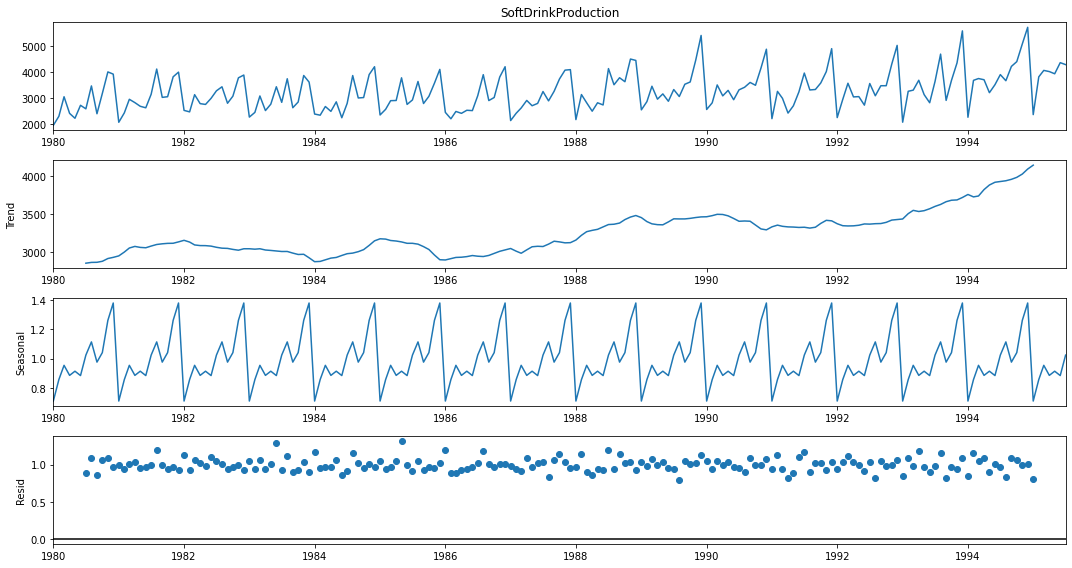

In [42]:
decomposition_m = seasonal_decompose(df['SoftDrinkProduction'],model='multiplicative')
decomposition_m.plot();

From the above decomposition plot, we can see that the time series data is having the trend, seasonality. The residual is lying from 0.5 to 1.0 on Y- axis which is very low when compared to the additive model.

Also, the magnitude of the seasonal component changes with time.

### Hence, It is very clear that the time series is Multiplicative.

In [43]:
trend = decomposition_m.trend
seasonality = decomposition_m.seasonal
residual = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

### 3. Split the data into training and test. The test data should start in 1991.

In [44]:
#Train-Test Split

Train=df[df.index.year < 1991]
Test=df[df.index.year >= 1991]

In [45]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [46]:
print('First few rows of Training Data','\n',Train.head(),'\n')
print('Last few rows of Training Data','\n',Train.tail(),'\n')
print('First few rows of Test Data','\n',Test.head(),'\n')
print('Last few rows of Test Data','\n',Test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226 

Last few rows of Training Data 
             SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882 

First few rows of Test Data 
             SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707 

Last few rows of Test Data 
             SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995

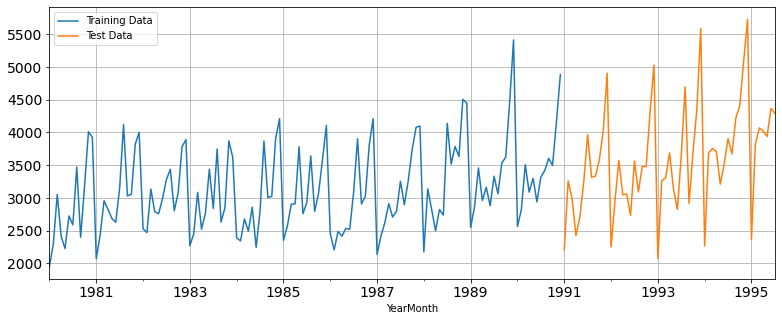

In [47]:
Train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
Test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()
#plt.savefig('train-test.png')

We can see that now the train & test data are split, The test data starts from 1991 where as the train data starts before 1981 & ends 1990. From train test split we can predict the similar performance compared to past years.

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### RMSE — Root Mean Squared Error

RMSE tells you how many units your model is wrong on average.

#### Model1: Linear Regression

For linear regression, the equation will be y=a+b(time)

For this particular linear regression, we are going to regress the 'Shoe_Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [48]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [49]:
#we have generated the numerical time instance order for both the training and test data. 
#Now we will add these values in the training and test data.

In [50]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [51]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  Time
YearMonth                            
1980-01-01                 1954     1
1980-02-01                 2302     2
1980-03-01                 3054     3
1980-04-01                 2414     4
1980-05-01                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  Time
YearMonth                            
1990-08-01                 3418   128
1990-09-01                 3604   129
1990-10-01                 3495   130
1990-11-01                 4163   131
1990-12-01                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  Time
YearMonth                            
1991-01-01                 2211    43
1991-02-01                 3260    44
1991-03-01                 2992    45
1991-04-01                 2425    46
1991-05-01                 2707    47 

Last few rows of Test Data 
             SoftDrinkProduction  Time
YearMonth                       

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

In [55]:
#predictions on train data
train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
print([train_predictions_model1])

[array([2787.26304397, 2792.40661073, 2797.55017749, 2802.69374425,
       2807.83731101, 2812.98087777, 2818.12444453, 2823.26801128,
       2828.41157804, 2833.5551448 , 2838.69871156, 2843.84227832,
       2848.98584508, 2854.12941184, 2859.27297859, 2864.41654535,
       2869.56011211, 2874.70367887, 2879.84724563, 2884.99081239,
       2890.13437915, 2895.27794591, 2900.42151266, 2905.56507942,
       2910.70864618, 2915.85221294, 2920.9957797 , 2926.13934646,
       2931.28291322, 2936.42647998, 2941.57004673, 2946.71361349,
       2951.85718025, 2957.00074701, 2962.14431377, 2967.28788053,
       2972.43144729, 2977.57501404, 2982.7185808 , 2987.86214756,
       2993.00571432, 2998.14928108, 3003.29284784, 3008.4364146 ,
       3013.57998136, 3018.72354811, 3023.86711487, 3029.01068163,
       3034.15424839, 3039.29781515, 3044.44138191, 3049.58494867,
       3054.72851542, 3059.87208218, 3065.01564894, 3070.1592157 ,
       3075.30278246, 3080.44634922, 3085.58991598, 3090.7334

In [56]:
#predictions on test data
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
print([test_predictions_model1])

[array([3003.29284784, 3008.4364146 , 3013.57998136, 3018.72354811,
       3023.86711487, 3029.01068163, 3034.15424839, 3039.29781515,
       3044.44138191, 3049.58494867, 3054.72851542, 3059.87208218,
       3065.01564894, 3070.1592157 , 3075.30278246, 3080.44634922,
       3085.58991598, 3090.73348274, 3095.87704949, 3101.02061625,
       3106.16418301, 3111.30774977, 3116.45131653, 3121.59488329,
       3126.73845005, 3131.8820168 , 3137.02558356, 3142.16915032,
       3147.31271708, 3152.45628384, 3157.5998506 , 3162.74341736,
       3167.88698412, 3173.03055087, 3178.17411763, 3183.31768439,
       3188.46125115, 3193.60481791, 3198.74838467, 3203.89195143,
       3209.03551818, 3214.17908494, 3219.3226517 , 3224.46621846,
       3229.60978522, 3234.75335198, 3239.89691874, 3245.0404855 ,
       3250.18405225, 3255.32761901, 3260.47118577, 3265.61475253,
       3270.75831929, 3275.90188605, 3281.04545281])]


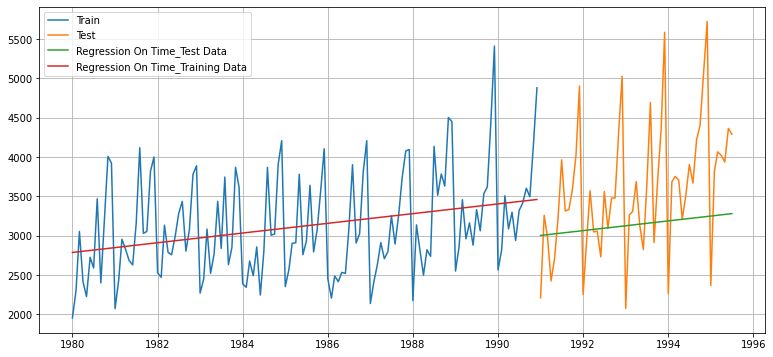

In [57]:
plt.figure(figsize=(13,6))
plt.plot( Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();
#plt.savefig('lr-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data and the green line represents the linear regression values that we have calculated and which cuts the curves almost mean / average of the data.

The average trend is shown between 1992 and 1994. We can observe that, the gap from regression line to upward peak and downward peak which we predicted is high. From this, we can understand that the error is high.

Hence, we can use the Linear Regression model to predict the trend in the timeseries data.

#### performing metrics and model valuation

In [58]:
from sklearn import metrics

In [59]:
## Test Data - RMSE 

rmse_model1_test = metrics.mean_squared_error(Test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("Regression On Time forecast on the Test Data: \nRMSE is %3.3f" %(rmse_model1_test))

Regression On Time forecast on the Test Data: 
RMSE is 898.173


In [60]:
results_df = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
results_df

Test RMSE
RegressionOnTime  898.172528

#### Model2: Naive Forecast Model

Naive forecast involves using the previous observation directly as the forecast without any change. 

It is often called the persistence forecast as the prior observation is persisted.

In [61]:
Naive_train = Train.copy()
Naive_test = Test.copy()

In [62]:
Naive_train['naive'] = np.asarray(Train['SoftDrinkProduction'])[len(np.asarray(Train['SoftDrinkProduction']))-1]
Naive_train['naive'].head()

YearMonth
1980-01-01    4882
1980-02-01    4882
1980-03-01    4882
1980-04-01    4882
1980-05-01    4882
Name: naive, dtype: int64

In [63]:
Naive_test['naive'] = np.asarray(Train['SoftDrinkProduction'])[len(np.asarray(Train['SoftDrinkProduction']))-1]
Naive_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

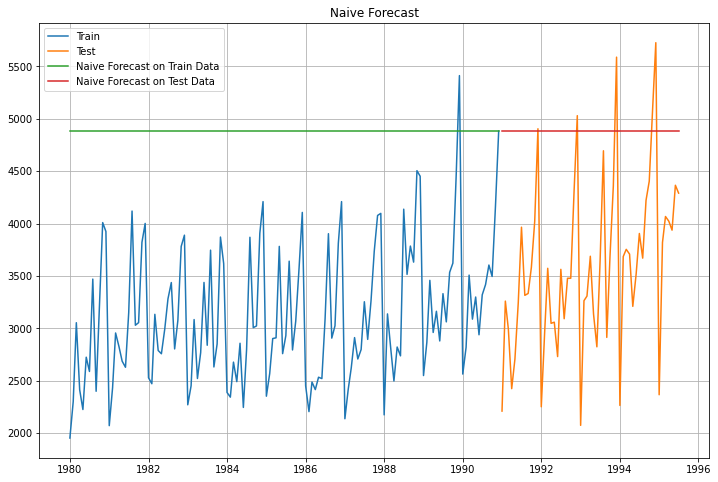

In [64]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')
plt.plot(Naive_train['naive'], label='Naive Forecast on Train Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
#plt.savefig('Naive-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data and the red line represents the naive forecast.

The error is very high for predicted values in the test data.

The error in naive model is very high compared to the linear regression model.

We cannot predict the trend in the naive forecast model.

#### performing metrics and model valuation

In [65]:
## Test Data - RMSE 

rmse_model2_test = metrics.mean_squared_error(Test['SoftDrinkProduction'],Naive_test['naive'],squared=False)
print("Naive Model forecast on the Test Data,\nRMSE is %3.3f" %(rmse_model2_test))

Naive Model forecast on the Test Data,
RMSE is 1519.259


In [66]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

results_df = pd.concat([results_df, results_df2])
results_df

Test RMSE
RegressionOnTime   898.172528
NaiveModel        1519.259233

In [67]:
# we can observe that the RMSE for Naive model is higher than the Regression model.h

#### Model3:Simple Average Model

This model averages the data by months or quarters or years and then calculate the average for the period. Then find out, what percentage it is to the grand average.

In [68]:
#For this particular simple average method, 
#we will forecast by using the average of the training values.

In [69]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [70]:
SimpleAverage_train['mean_forecast'] = Train['SoftDrinkProduction'].mean()
SimpleAverage_train.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1980-01-01                 1954    3124.166667
1980-02-01                 2302    3124.166667
1980-03-01                 3054    3124.166667
1980-04-01                 2414    3124.166667
1980-05-01                 2226    3124.166667

In [71]:
SimpleAverage_test['mean_forecast'] = Train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

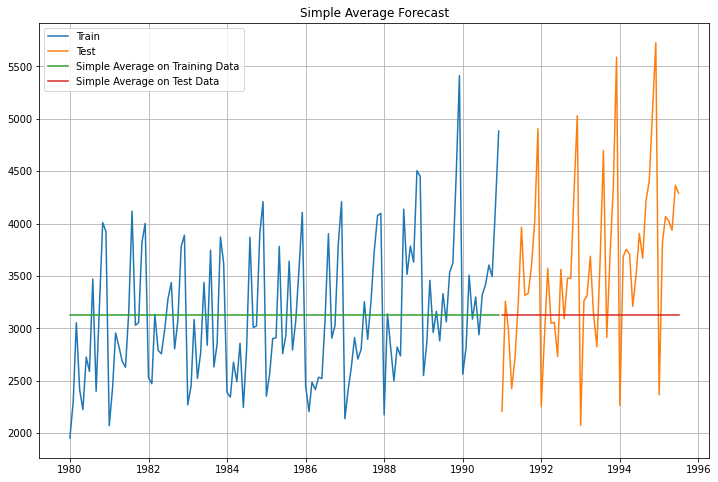

In [72]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();
#plt.savefig('SA-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data.

The red line represents the predicted simple average values which takes the average of the train data and cuts test curve almost near to the mean of the data.

The error is very high for predicted values in the test data.

We can not predict the trend in Simple Average model aslo.

#### performing metrics and model valuation

In [73]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(Test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data:\nRMSE is %3.3f" %(rmse_model3_test))

Simple Average forecast on the Test Data:
RMSE is 934.353


In [74]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

results_df = pd.concat([results_df, results_df3])
results_df

Test RMSE
RegressionOnTime     898.172528
NaiveModel          1519.259233
SimpleAverageModel   934.353358

#### Model4:Moving Average Model

The moving average is a statistical method used for forecasting the long-term trends. We take an average of a set of numbers in a given range while moving the range. The moving average method is used with time-series data to smooth out short-term fluctuations and long-term trends.

We are rolling means or moving averages for different intervals. 

The best interval can be determined by the maximum accuracy or the minimum error.

In [75]:
MovingAverage = df.copy()
MovingAverage.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [76]:
#Trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                             
1980-01-01                 1954         NaN         NaN         NaN   
1980-02-01                 2302      2128.0         NaN         NaN   
1980-03-01                 3054      2678.0         NaN         NaN   
1980-04-01                 2414      2734.0      2431.0         NaN   
1980-05-01                 2226      2320.0      2499.0         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

In [77]:
#While performing rolling windows we will get NaN values , so we have to be careful.

The window of the moving average is need to be carefully selected. Because too big a window will result in not having any test set as the whole series might get averaged over.

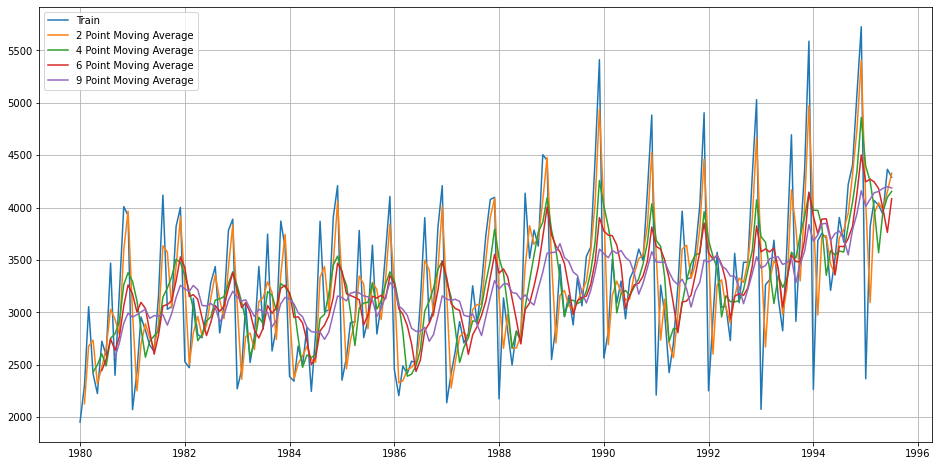

In [78]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

From the above Moving Average plot, 2 point moving average is almost tracing the original train data. Hence, it'll have less error. when we are increasing the rolling window value like 4 point moving average it got smoothened a bit compared to the 2 point moving average. when we observe 9 point moving average plot the fluctuations are smoothed much compared to 2 point, 4 point, 6 point moving averages. so, as per the increasing year the smoothing would be higher.

In [79]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [80]:
trailing_MovingAverage_train.tail()

SoftDrinkProduction  Trailing_2  Trailing_4   Trailing_6  \
YearMonth                                                              
1990-08-01                 3418      3369.0     3244.00  3262.000000   
1990-09-01                 3604      3511.0     3320.25  3278.000000   
1990-10-01                 3495      3549.5     3459.25  3345.833333   
1990-11-01                 4163      3829.0     3670.00  3489.833333   
1990-12-01                 4882      4522.5     4036.00  3813.666667   

             Trailing_9  
YearMonth                
1990-08-01  3374.111111  
1990-09-01  3173.333333  
1990-10-01  3276.777778  
1990-11-01  3426.000000  
1990-12-01  3578.666667

In [81]:
trailing_MovingAverage_train.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                             
1980-01-01                 1954         NaN         NaN         NaN   
1980-02-01                 2302      2128.0         NaN         NaN   
1980-03-01                 3054      2678.0         NaN         NaN   
1980-04-01                 2414      2734.0      2431.0         NaN   
1980-05-01                 2226      2320.0      2499.0         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

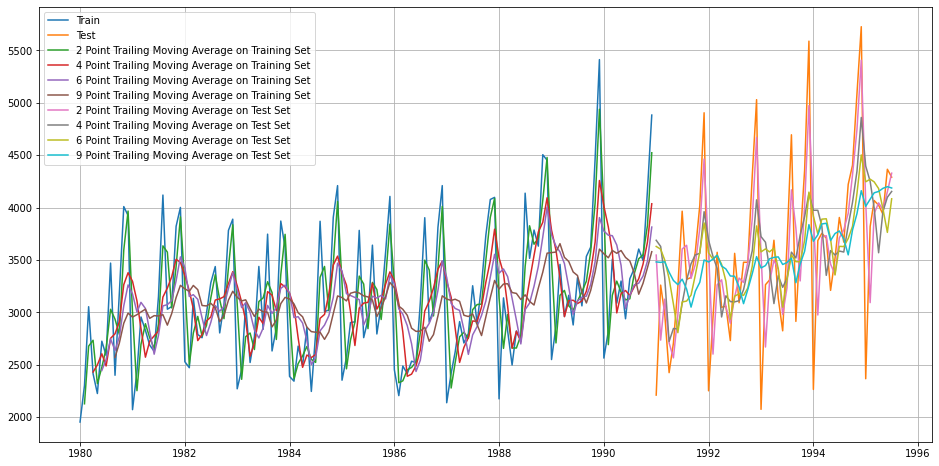

In [82]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

we can observe that the 2 point moving average is almost tracing the original data and having minimum error. Hence, Lower the rolling window value less the error, higher the rolling window value higher the error.

#### performing metrics and model evaluation (for the test data)

In [83]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(Test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("2 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_2))


## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(Test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("4 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_4))


## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(Test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("6 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(Test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("9 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_9))

2 point Moving Average Model forecast on the Testing Data:
RMSE is 556.725
4 point Moving Average Model forecast on the Testing Data:
RMSE is 687.182
6 point Moving Average Model forecast on the Testing Data:
RMSE is 710.514
9 point Moving Average Model forecast on the Testing Data:
RMSE is 735.890


In [84]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results_df4])
results_df

Test RMSE
RegressionOnTime              898.172528
NaiveModel                   1519.259233
SimpleAverageModel            934.353358
2pointTrailingMovingAverage   556.725418
4pointTrailingMovingAverage   687.181726
6pointTrailingMovingAverage   710.513877
9pointTrailingMovingAverage   735.889827

In [85]:
#2 point moving average is having less RMSE value compared to all the models.

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

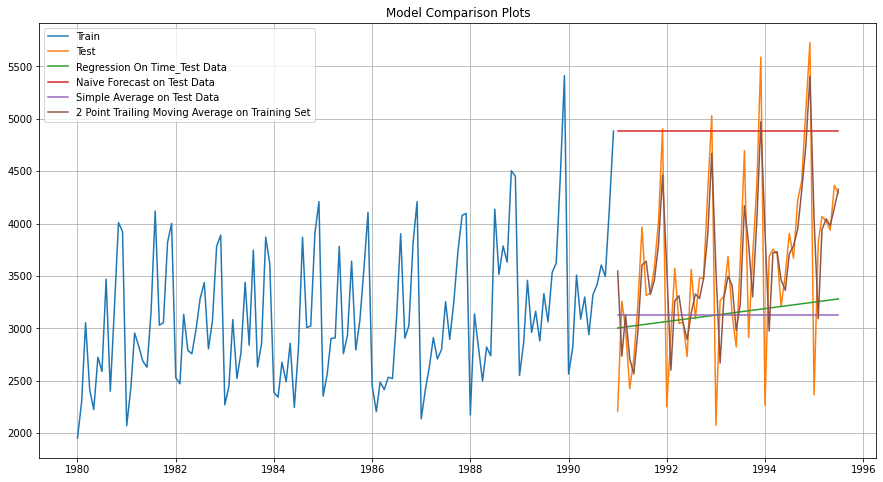

In [86]:
## Plotting on both Training and Test data

#plt.figure(figsize=(30,12))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

From the plot, we can observe that the 2 point moving average model having the least error.

#### Model5:Simple Exponential Smoothing (automated)

Simple Exponential Smoothing is a time series forecasting method  used for univariate data without a trend or seasonality. 

It requires a single parameter, called alpha (a), which is also called the smoothing factor or smoothing coefficient.

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [89]:
SES_train = Train.copy()
SES_test = Test.copy()

In [90]:
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

In [91]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [92]:
print(model_SES_autofit.summary())

                        SimpleExpSmoothing Model Results                       
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:              SimpleExpSmoothing   SSE                       54364308.436
Optimized:                        True   AIC                           1710.551
Trend:                            None   BIC                           1716.317
Seasonal:                         None   AICC                          1710.866
Seasonal Periods:                 None   Date:                 Sun, 03 Apr 2022
Box-Cox:                         False   Time:                         18:33:04
Box-Cox Coeff.:                   None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2162886                alpha                 True
initial_level              2297.4229       

In [93]:
model_SES_autofit.params

{'smoothing_level': 0.2162885602609007,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2297.422897653051,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

we get the optimised parameters by using the autofit. smoothing level is alpha, smoothing trend is beta and smoothing seasonal is gamma.

we dont consider the trend and seasonal it is showing as nan because we are now using the simple exponential smoothing. 

As It requires a single parameter, called alpha (a), which is also called the smoothing factor or smoothing coefficient.

In [94]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

SoftDrinkProduction      predict
YearMonth                                   
1980-01-01                 1954  2297.422898
1980-02-01                 2302  2223.144454
1980-03-01                 3054  2240.200006
1980-04-01                 2414  2416.215635
1980-05-01                 2226  2415.736419

In [95]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

SoftDrinkProduction      predict
YearMonth                                   
1991-01-01                 2211  3853.781071
1991-02-01                 3260  3853.781071
1991-03-01                 2992  3853.781071
1991-04-01                 2425  3853.781071
1991-05-01                 2707  3853.781071

In [96]:
#For prediction, we need to use autofit.forecast for the steps of length of the test data 
#so that we can produce as many forcasted values as the length of the test data.

Text(0.5, 1.0, 'Alpha =0.216 Predictions')

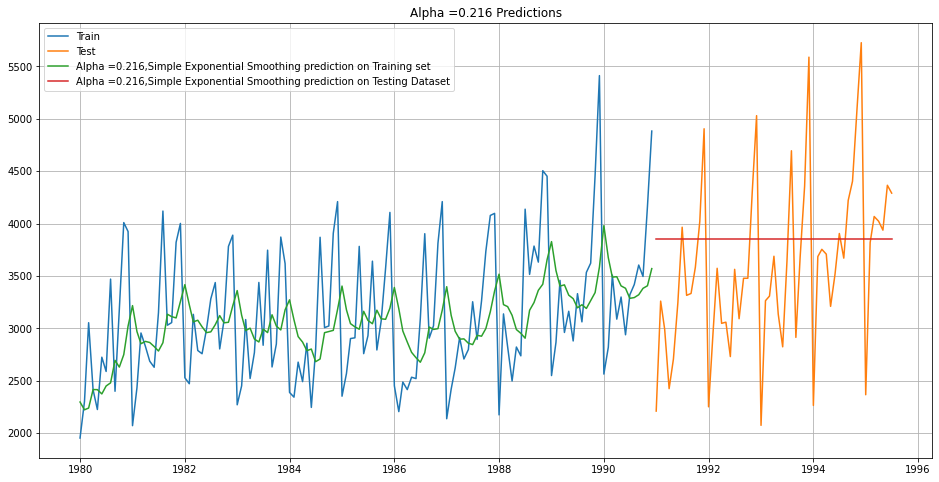

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.216,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test['predict'], label='Alpha =0.216,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.216 Predictions')

#### performing metrics and model evaluation (for the test data)

In [98]:
## Test Data --RMSE

rmse_model5_test = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
print("Alpha =0.216 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test))


Alpha =0.216 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 847.635


In [99]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0.216,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df5])
results_df

Test RMSE
RegressionOnTime                         898.172528
NaiveModel                              1519.259233
SimpleAverageModel                       934.353358
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
Alpha=0.216,SimpleExponentialSmoothing   847.635259

In [100]:
#Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### Model6:Simple Exponential Model with alpha in range of 0.1 to 0.1

In [101]:
## First we will define an empty dataframe to store our values from the loop
results_df6_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
results_df6_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [102]:
for i in np.arange(0.1,1.0,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model6_train_i = metrics.mean_squared_error(SES_train['SoftDrinkProduction'],SES_train['predict',i],squared=False)
    
    rmse_model6_test_i = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict',i],squared=False)
    
    
    results_df6_model = results_df6_model.append({'Alpha Values':i,'Train RMSE':rmse_model6_train_i 
                                      ,'Test RMSE':rmse_model6_test_i}, ignore_index=True)

In [103]:
# we are manually giving alpha values in a range and while fitting the model, range is given for smoothing level.

# Hence, we are not asking model to give us optimized value. 

# we keep it as false and we us brute force method. 

# while performing metrics we keep squared as false since by default it takes as true
#and wil give us MSE value instead of RMSE as we are using mean squared error.

In [104]:
results_df6_model

Alpha Values    Test RMSE  Train RMSE
0           0.1   807.346881  629.183163
1           0.2   838.357158  639.434755
2           0.3   910.187416  648.029705
3           0.4  1005.179377  655.598855
4           0.5  1105.985227  664.145354
5           0.6  1203.565956  674.666863
6           0.7  1294.680933  687.232192
7           0.8  1378.198740  701.529689
8           0.9  1453.359494  717.278420

In [105]:
 results_df6_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values    Test RMSE  Train RMSE
0           0.1   807.346881  629.183163
1           0.2   838.357158  639.434755
2           0.3   910.187416  648.029705
3           0.4  1005.179377  655.598855
4           0.5  1105.985227  664.145354
5           0.6  1203.565956  674.666863
6           0.7  1294.680933  687.232192
7           0.8  1378.198740  701.529689
8           0.9  1453.359494  717.278420

After sorting the values with respect to test RMSE, I'm choosing alpha with 0.1 since it is having low RMSE 807.346881.

In [106]:
model_SES_s = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])
model_SES_s_autofit = model_SES.fit(smoothing_level=0.1, optimized=True,use_brute=True)

In [107]:
print(model_SES_s_autofit.summary())

                        SimpleExpSmoothing Model Results                       
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:              SimpleExpSmoothing   SSE                       52255031.765
Optimized:                        True   AIC                           1705.328
Trend:                            None   BIC                           1711.093
Seasonal:                         None   AICC                          1705.642
Seasonal Periods:                 None   Date:                 Sun, 03 Apr 2022
Box-Cox:                         False   Time:                         18:33:05
Box-Cox Coeff.:                   None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              2746.0946       

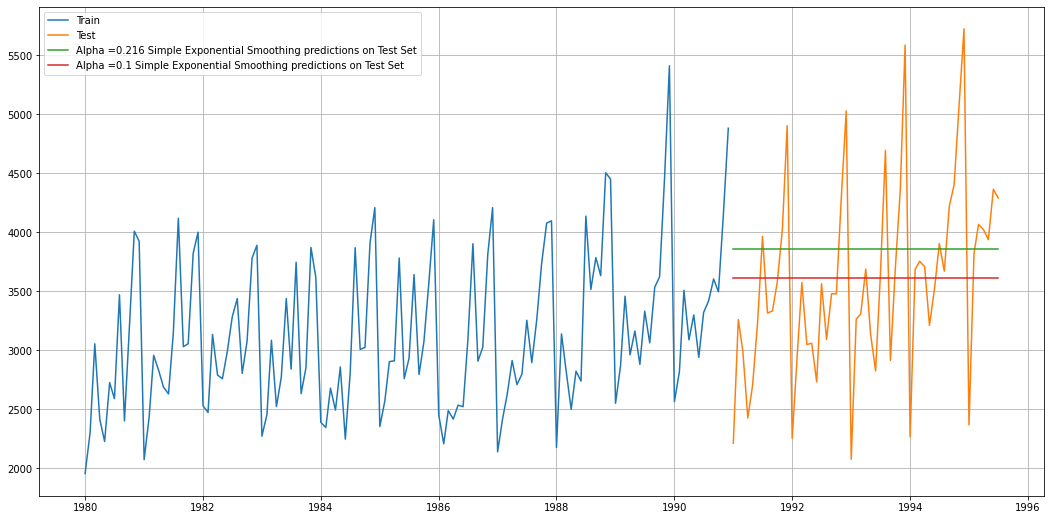

In [108]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

#plt.plot(SES_train['predict'], label='Alpha =0.065 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.216 Simple Exponential Smoothing predictions on Test Set')

#plt.plot(SES_train['predict', 0.1], label='Alpha =0.1imple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [109]:
# alpha = 0.1 having less error but it is not having any trend or seasonality

In [110]:
results_df6 = pd.DataFrame({'Test RMSE': [results_df6_model['Test RMSE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df,results_df6 ])
results_df

Test RMSE
RegressionOnTime                         898.172528
NaiveModel                              1519.259233
SimpleAverageModel                       934.353358
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
Alpha=0.216,SimpleExponentialSmoothing   847.635259
Alpha=0.1,SimpleExponentialSmoothing     807.346881

#### Model7: Double Exponential Smoothing

Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

Including the alpha($\alpha$) parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta ($\beta$).

Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [111]:
DES_train = Train.copy()
DES_test = Test.copy()

In [112]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

#we are using Holt method where we consider smoothing level and trend but not seasonality that is alpha and beta respectively.

In [113]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [114]:
print(model_DES_autofit.summary())

                               Holt Model Results                              
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                            Holt   SSE                       59570554.781
Optimized:                        True   AIC                           1726.623
Trend:                        Additive   BIC                           1738.154
Seasonal:                         None   AICC                          1727.295
Seasonal Periods:                 None   Date:                 Sun, 03 Apr 2022
Box-Cox:                         False   Time:                         18:33:06
Box-Cox Coeff.:                   None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3940653                alpha                 True
smoothing_trend            0.0677053       

In [115]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.394065       True
smoothing_trend   beta     0.067705       True
initial_level      l.0  2225.899026       True
initial_trend      b.0    63.127865       True

In [116]:
# predictions on training data
DES_train['predict',0.39,0.0] = model_DES_autofit.fittedvalues
DES_train.head()

SoftDrinkProduction  (predict, 0.39, 0.0)
YearMonth                                            
1980-01-01                 1954           2289.026891
1980-02-01                 2302           2211.193673
1980-03-01                 3054           2303.589281
1980-04-01                 2414           2675.933259
1980-05-01                 2226           2642.359169

In [117]:
DES_test['predict',0.39,0.0] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

SoftDrinkProduction  (predict, 0.39, 0.0)
YearMonth                                            
1991-01-01                 2211           4252.678190
1991-02-01                 3260           4306.875038
1991-03-01                 2992           4361.071886
1991-04-01                 2425           4415.268733
1991-05-01                 2707           4469.465581

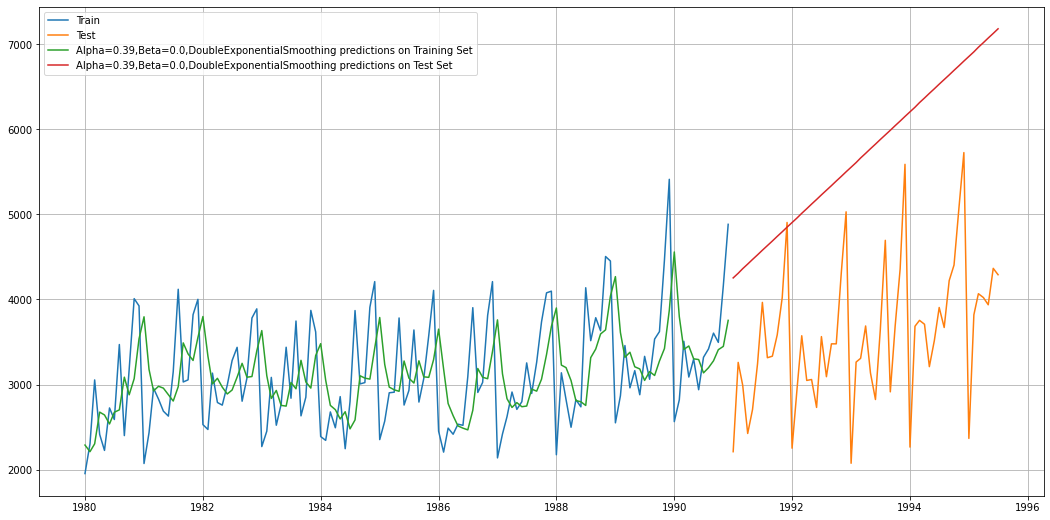

In [118]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_train['predict', 0.39, 0.0], label='Alpha=0.39,Beta=0.0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.39, 0.0], label='Alpha=0.39,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [119]:
## Test Data --RMSE

rmse_model7_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',0.39,0.0],squared=False)
print("Alpha=0.39 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model7_test))


Alpha=0.39 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is 2301.543


In [120]:
results_df7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]}
                           ,index=['Alpha=0.39 and Beta=0,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df7])
results_df

Test RMSE
RegressionOnTime                                   898.172528
NaiveModel                                        1519.259233
SimpleAverageModel                                 934.353358
2pointTrailingMovingAverage                        556.725418
4pointTrailingMovingAverage                        687.181726
6pointTrailingMovingAverage                        710.513877
9pointTrailingMovingAverage                        735.889827
Alpha=0.216,SimpleExponentialSmoothing             847.635259
Alpha=0.1,SimpleExponentialSmoothing               807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing  2301.542724

#### Model8:Double Exponential Model with alpha in range of 0.1 to 0.1

In [121]:
DES_train_d = Train.copy()
DES_test_d = Test.copy()

In [122]:
model_DES_d = Holt(DES_train_d['SoftDrinkProduction'])

In [123]:
## First we will define an empty dataframe to store our values from the loop

results_df_d = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_d

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [124]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,0.9,0.1):
        model_DES_d_alpha_i_beta_j = model_DES_d.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_d['predict',i,j] = model_DES_d_alpha_i_beta_j.fittedvalues
        DES_test_d['predict',i,j] = model_DES_d_alpha_i_beta_j.forecast(steps=len(DES_test_d))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train_d['SoftDrinkProduction'],DES_train_d['predict',i,j],squared=False)
        
        rmse_model8_test = metrics.mean_squared_error(DES_test_d['SoftDrinkProduction'],DES_test_d['predict',i,j],squared=False)
        
        results_df_d = results_df_d.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                      ,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [125]:
results_df_d

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1   636.982831    985.423307
1            0.1          0.2   649.470017   1084.073803
2            0.1          0.3   660.310399   1715.626059
3            0.1          0.4   672.768318   2432.589419
4            0.1          0.5   688.314185   3011.893208
..           ...          ...          ...           ...
67           0.9          0.4   851.235550  15343.566954
68           0.9          0.5   887.401121  17711.979011
69           0.9          0.6   925.262375  19784.208514
70           0.9          0.7   964.699606  21623.751079
71           0.9          0.8  1005.454300  23239.543208

[72 rows x 4 columns]

In [126]:
results_df_d.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1   636.982831    985.423307
1            0.1          0.2   649.470017   1084.073803
8            0.2          0.1   657.308598   1524.527761
2            0.1          0.3   660.310399   1715.626059
16           0.3          0.1   671.320234   2306.003980
..           ...          ...          ...           ...
62           0.8          0.7   922.464802  20984.112822
55           0.7          0.8   912.492050  21620.121482
70           0.9          0.7   964.699606  21623.751079
63           0.8          0.8   959.389040  22747.464839
71           0.9          0.8  1005.454300  23239.543208

[72 rows x 4 columns]

After sorting values I'm choosing alpha = 0.1 and beta = 0.1 since it is having low test RMSE.

In [127]:
model_DES_d = Holt(DES_train_d['SoftDrinkProduction'])
Holt_model_results = model_DES_d.fit(smoothing_level=0.1,smoothing_slope=0.1,optimized=True,use_brute=True)

In [128]:
print(Holt_model_results.summary())

                               Holt Model Results                              
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                            Holt   SSE                       53558620.762
Optimized:                        True   AIC                           1712.580
Trend:                        Additive   BIC                           1724.111
Seasonal:                         None   AICC                          1713.252
Seasonal Periods:                 None   Date:                 Sun, 03 Apr 2022
Box-Cox:                         False   Time:                         18:33:09
Box-Cox Coeff.:                   None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_trend            0.1000000       

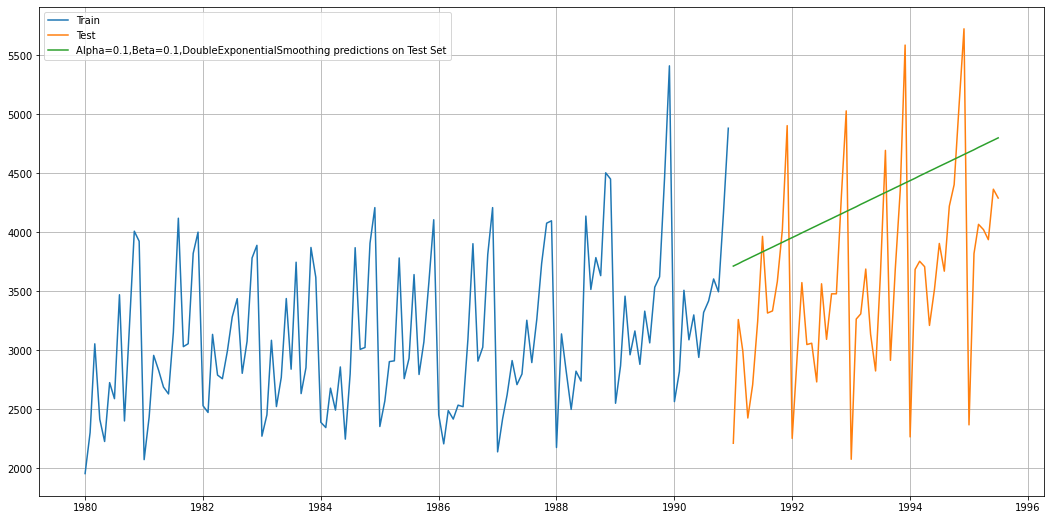

In [129]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_d['SoftDrinkProduction'], label='Train')
plt.plot(DES_test_d['SoftDrinkProduction'], label='Test')

plt.plot(DES_test_d['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [130]:
results_df8 = pd.DataFrame({'Test RMSE': [results_df_d['Test RMSE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df8])
results_df

Test RMSE
RegressionOnTime                                   898.172528
NaiveModel                                        1519.259233
SimpleAverageModel                                 934.353358
2pointTrailingMovingAverage                        556.725418
4pointTrailingMovingAverage                        687.181726
6pointTrailingMovingAverage                        710.513877
9pointTrailingMovingAverage                        735.889827
Alpha=0.216,SimpleExponentialSmoothing             847.635259
Alpha=0.1,SimpleExponentialSmoothing               807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing  2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      985.423307

#### Model:9 Triple Exponential Smoothing

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is also called Holt-Winters Exponential Smoothing.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

In [131]:
TES_train = Train.copy()
TES_test = Test.copy()

In [132]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'], freq='MS', trend='additive',seasonal='multiplicative')

In [133]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [134]:
model_TES_autofit.params

{'smoothing_level': 0.11102761730983592,
 'smoothing_trend': 0.04932588178949664,
 'smoothing_seasonal': 0.3949408071529521,
 'damping_trend': nan,
 'initial_level': 2312.469315120127,
 'initial_trend': 5.940363987039598,
 'initial_seasons': array([1.07863773, 1.13580187, 1.38746591, 1.24816588, 1.28452544,
        1.26879511, 1.36688932, 1.66203911, 1.29410569, 1.38551337,
        1.76694885, 1.80085756]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [135]:
print(model_TES_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:      SoftDrinkProduction   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       13997124.553
Optimized:                         True   AIC                           1559.446
Trend:                         Additive   BIC                           1605.571
Seasonal:                Multiplicative   AICC                          1565.499
Seasonal Periods:                    12   Date:                 Sun, 03 Apr 2022
Box-Cox:                          False   Time:                         18:33:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1110276                alpha                 True
smoothing_trend          

In [136]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

SoftDrinkProduction  auto_predict
YearMonth                                    
1980-01-01                 1954   2500.724156
1980-02-01                 2302   2572.929845
1980-03-01                 3054   3108.856243
1980-04-01                 2414   2793.300477
1980-05-01                 2226   2831.301752

In [137]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

SoftDrinkProduction  auto_predict
YearMonth                                    
1991-01-01                 2211   2540.621164
1991-02-01                 3260   2896.115301
1991-03-01                 2992   3329.155911
1991-04-01                 2425   2978.160902
1991-05-01                 2707   3180.844354

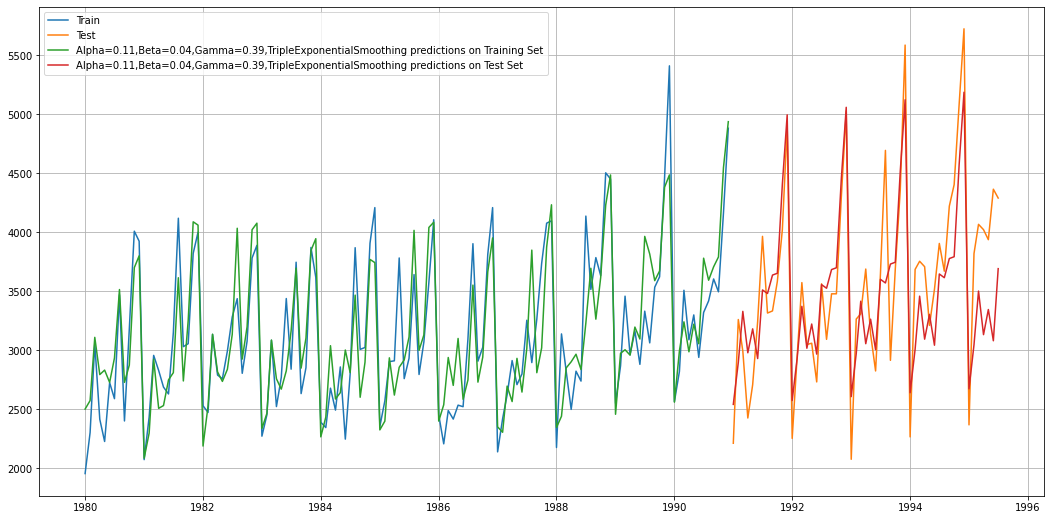

In [138]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [139]:
## Test Data --RMSE

rmse_model9_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("Alpha=0.11,Beta=0.04,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model9_test))

Alpha=0.11,Beta=0.04,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 460.438 


In [140]:
results_df9 = pd.DataFrame({'Test RMSE': [rmse_model9_test]}
                           ,index=['Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df9])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728

#### Model10:Triple Exponential Smoothing in range 0.1 to 0.1

In [141]:
## First we will define an empty dataframe to store our values from the loop

results_df_t = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_t

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [142]:
TES_train_t = Train.copy()
TES_test_t = Test.copy()

In [143]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.3,0.9,0.1):
            model_TES_t_alpha_i_beta_j_gamma_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test_t))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train_t['SoftDrinkProduction'],TES_train_t['predict',i,j,k],squared=False)
        
            rmse_model10_test = metrics.mean_squared_error(TES_test_t['SoftDrinkProduction'],TES_test_t['predict',i,j,k],squared=False)
        
            results_df_t = results_df_t.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model10_train
                                      ,'Test RMSE':rmse_model10_test}, ignore_index=True)

In [144]:
results_df_t

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.1          0.1           0.3     321.860701  5.495857e+02
1             0.1          0.1           0.4     325.882040  5.571820e+02
2             0.1          0.1           0.5     333.498924  5.599540e+02
3             0.1          0.1           0.6     337.601461  5.590739e+02
4             0.1          0.1           0.7     348.622386  5.558388e+02
..            ...          ...           ...            ...           ...
562           0.9          0.9           0.5    2233.905451  1.191355e+05
563           0.9          0.9           0.6  112655.493383  3.074045e+05
564           0.9          0.9           0.7   18242.098225  2.178133e+06
565           0.9          0.9           0.8   22583.752895  8.190436e+04
566           0.9          0.9           0.9   34507.614296  3.299437e+05

[567 rows x 5 columns]

In [145]:
results_df_t.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
211           0.4          0.4           0.4  4.131097e+02  4.273311e+02
259           0.5          0.2           0.3  3.581696e+02  4.364422e+02
315           0.6          0.1           0.3  3.526730e+02  4.411676e+02
161           0.3          0.6           0.3  3.917324e+02  4.420957e+02
379           0.7          0.1           0.4  3.698664e+02  4.645893e+02
..            ...          ...           ...           ...           ...
545           0.9          0.6           0.9  4.923867e+05  1.464006e+07
550           0.9          0.7           0.7  1.058364e+07  1.591301e+07
222           0.4          0.5           0.8  2.556663e+03  1.892297e+07
425           0.7          0.7           0.8  1.679066e+03  1.986653e+07
249           0.4          0.9           0.7  4.378220e+03  2.031246e+07

[567 rows x 5 columns]

After sorting the values with respect to low RMSE value I'm choosing alha = 0.4, beta = 0.4, gamma = 0.4.

In [146]:
model_TES_t = ExponentialSmoothing(TES_train_t['SoftDrinkProduction'], freq='MS', trend='additive',seasonal='multiplicative')
model_TES_t_autofit = model_TES_t.fit(smoothing_level=0.4,smoothing_slope=0.4,smoothing_seasonal=0.4,optimized=True,use_brute=True)

In [147]:
print(model_TES_t_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:      SoftDrinkProduction   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       22527071.319
Optimized:                         True   AIC                           1622.260
Trend:                         Additive   BIC                           1668.385
Seasonal:                Multiplicative   AICC                          1628.313
Seasonal Periods:                    12   Date:                 Sun, 03 Apr 2022
Box-Cox:                          False   Time:                         18:33:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_trend          

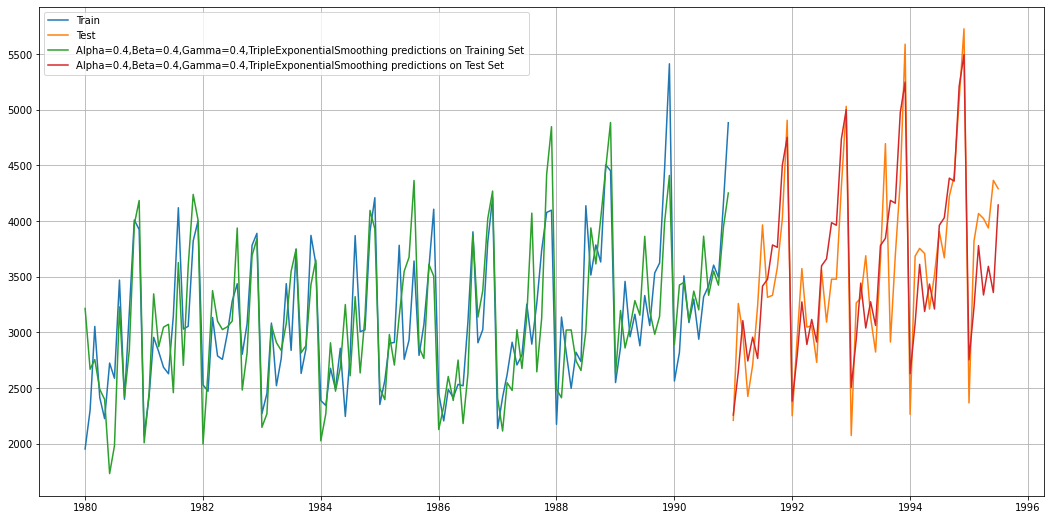

In [148]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_t['SoftDrinkProduction'], label='Train')
plt.plot(TES_test_t['SoftDrinkProduction'], label='Test')

plt.plot(TES_train_t['predict', 0.4, 0.4, 0.4], label='Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_t['predict', 0.4, 0.4, 0.4], label='Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

With the brute force method for triple exponential smoothing we got less error and tracing same as original test data compared to triple exponential smoothing with optimized values.

In [149]:
results_df10 = pd.DataFrame({'Test RMSE': [results_df_t.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing'])
results_df = pd.concat([results_df, results_df10])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067

In [150]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.216,SimpleExponentialSmoothing               847.635259
RegressionOnTime                                     898.172528
SimpleAverageModel                                   934.353358
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
NaiveModel                                          1519.259233
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724

We can now see that the best optimized model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.4 and $\gamma$ = 0.4.

The Triple exponential model is having both the trend and seasonality, It can work better compared to the other models.

**For the purpose of better understanding we are performing all the models and comparing them with respect to the RMSE values.**

Before moving to the ARIMA models,  let us plot all the models and compare the Time Series plots.

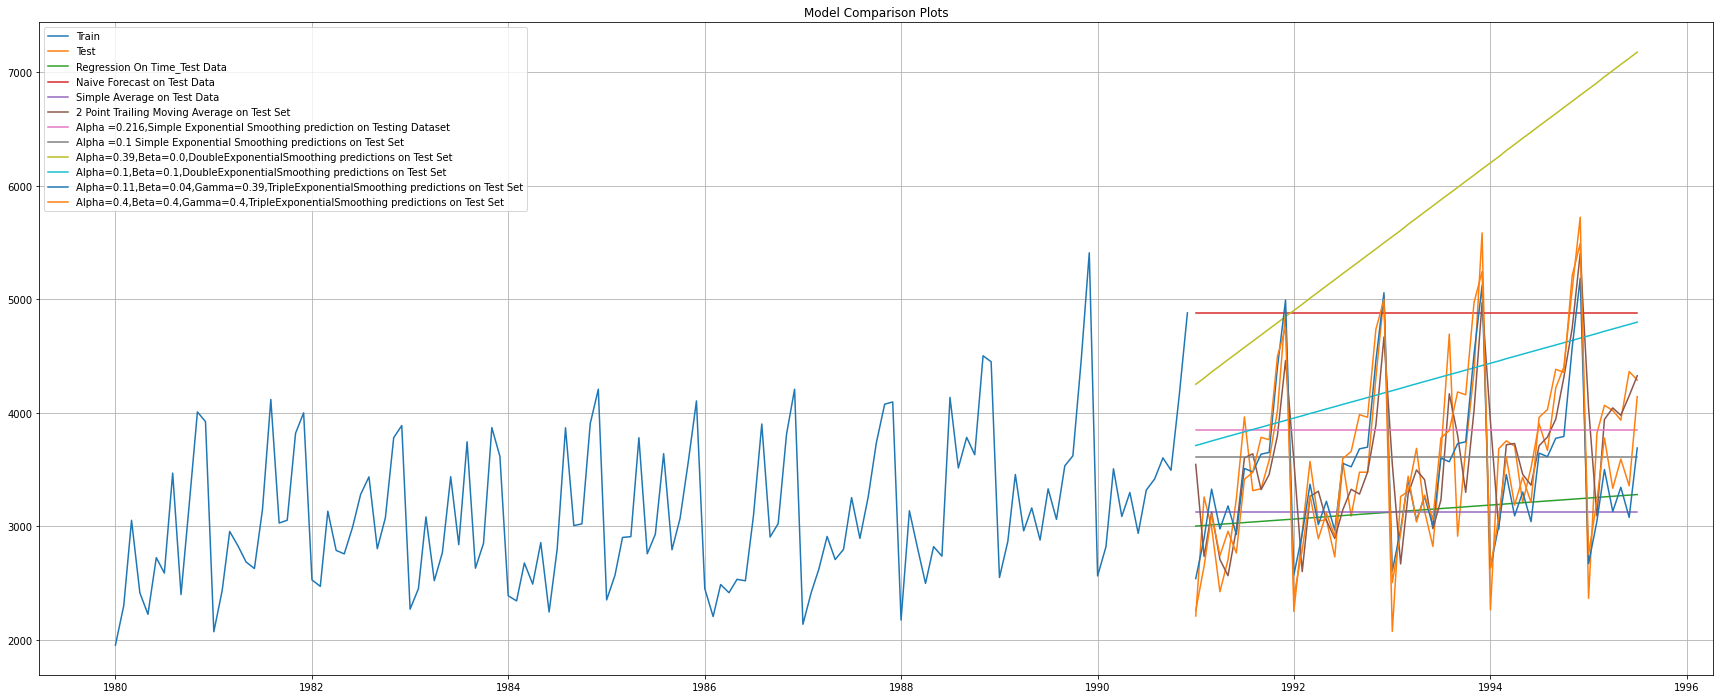

In [151]:
plt.figure(figsize=(30,12))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.216,Simple Exponential Smoothing prediction on Testing Dataset')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.39, 0.0], label='Alpha=0.39,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test_d['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test_t['predict', 0.4, 0.4, 0.4], label='Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

From the above plot, we can observe that Triple exponential model is best optimised as per the analysis till now, as the curve is almost tracing the original data.

#### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [152]:
#Check for stationarity of the series at α = 0.05 using appropriate statistical tests.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

* H0 : The Time Series is non-stationary.
* H1 : The Time Series is stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

In [153]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

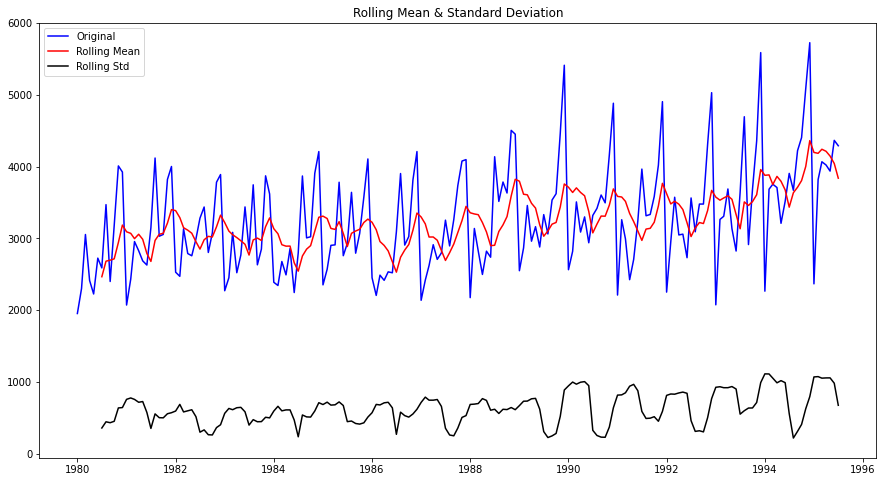

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [154]:
test_stationarity(df['SoftDrinkProduction'])

From the above plot,

blue colour is original data, red colour represents rolling mean window 7 and black one represents rolling standard deviation.

we can observe that p-value is greater than 0.05 which is 5% significnt level.

At a 5% significant level, we can see that the time series is non stationary.

**So, Let's take a difference of order 1 and check whether the Time Series is stationary or not.**

In [155]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time given series is non stationary

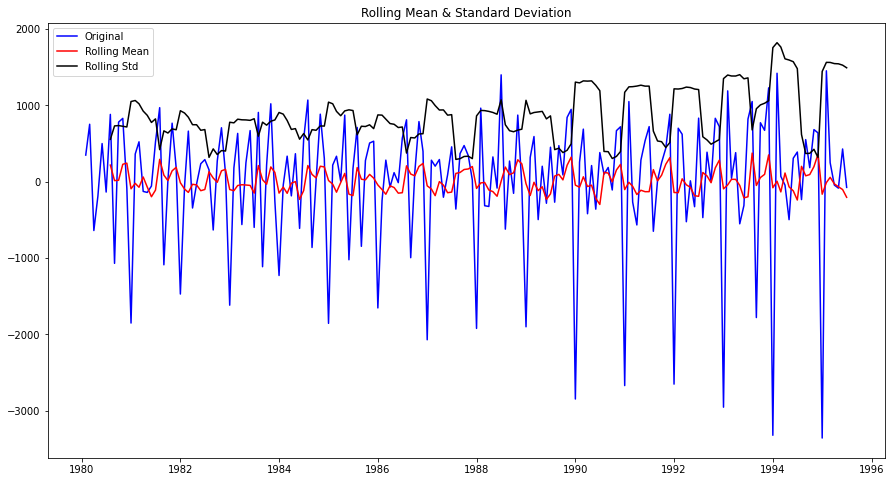

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [156]:
test_stationarity(df['SoftDrinkProduction'].diff().dropna())

Now, we can see that after taking a difference of order 1 and dropping null values, because when we do difference first and last we get null values.

Now, the p-value is less than 0.05, The time series is stationary.

here we have done first order difference, the d value in ARIMA model becomes 1.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [157]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

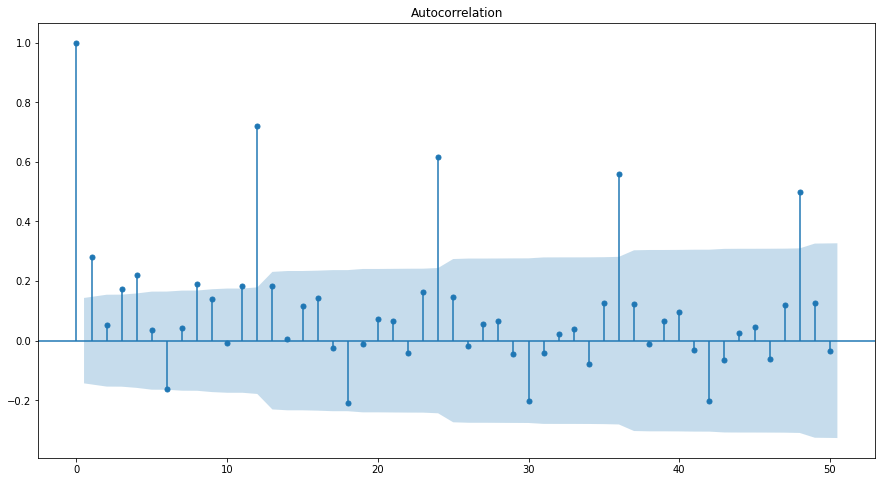

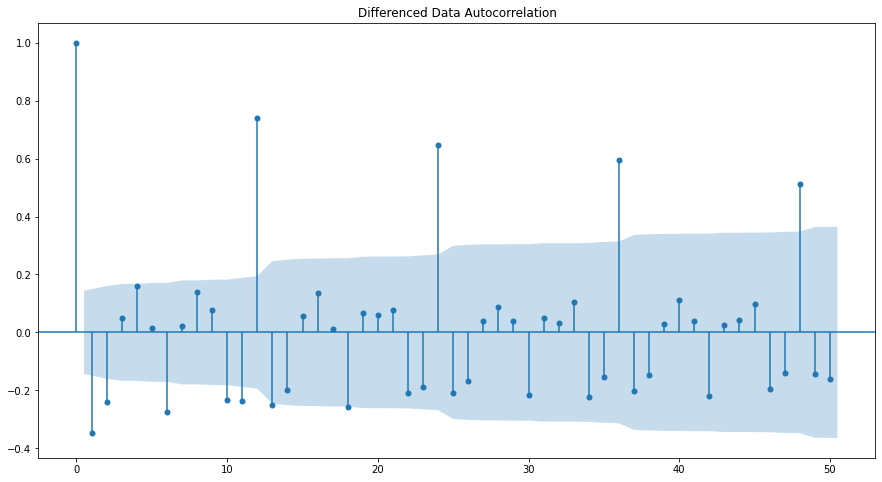

In [158]:
plot_acf(df['SoftDrinkProduction'],lags=50)
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From the ACF plot above,we can observe the auto correlation which is the shaded region represents the confidance range of that particular correlation. The values which are going beyond this confidence range represents the significant auto correlation. we can observe the evidence of seasonality in the original series. But for now I wont take original series since it is a non-stationary, Instead will choose 1st order difference series.

From the difference plot we can see that lags 0,1,6... are having the significant auto correlation we can take these values for q (AR).

Generally, we take small value of lag so that our model would be simple as we go further with big values the model becomes complex. Hence, we will find the optimum model at lower values of lags.

Here, for q we can take lag 0 i.e., q=0.

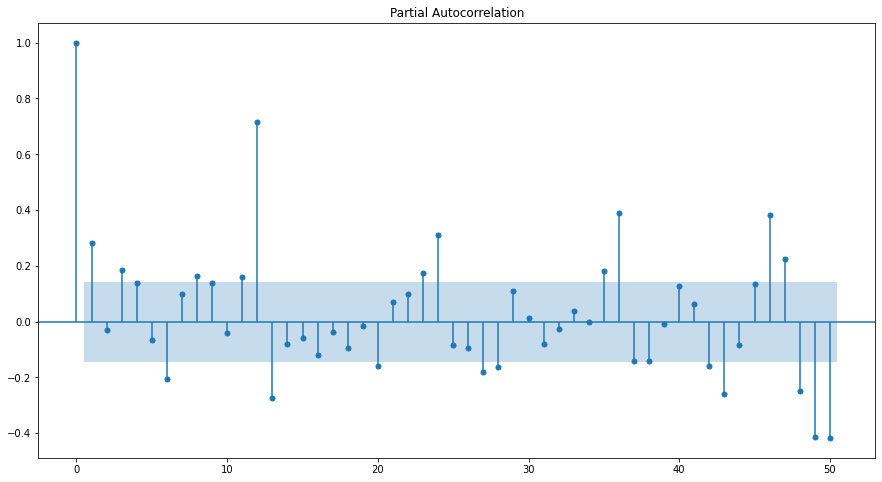

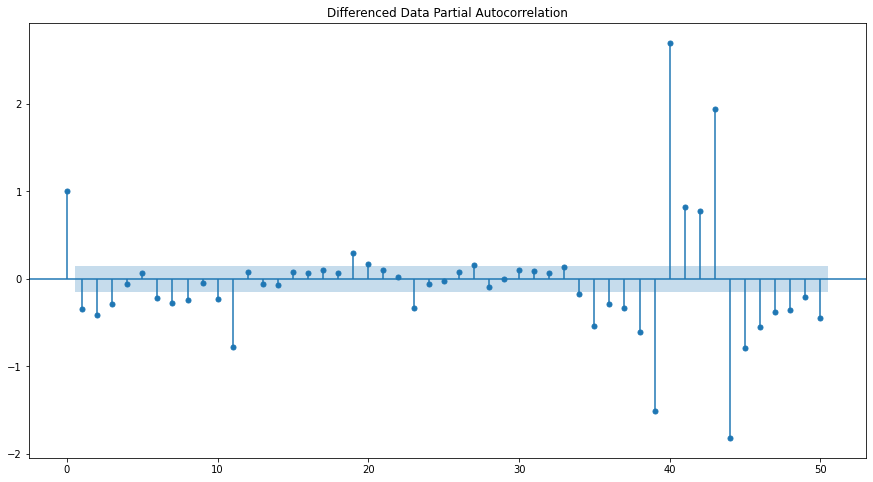

In [159]:
plot_pacf(df['SoftDrinkProduction'],lags=50)
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above PACF Plot,

The First order difference PACF (partial auto correlation) gives p (MA) value in p,d,q.
If we check for the lags which are having the significant auto correlation are 0,1,2,3,6.., we need our model to be optimum and simple. so, we need to choose the lags with low value.
 
For present scenario, we can choose p = 0.

The values of p,d,q becomes (0,1,0). since, it's a first order difference at d=1.

#### Check for stationarity of the Training Data Time Series.

In [160]:
#check for the stationarity only for training data.

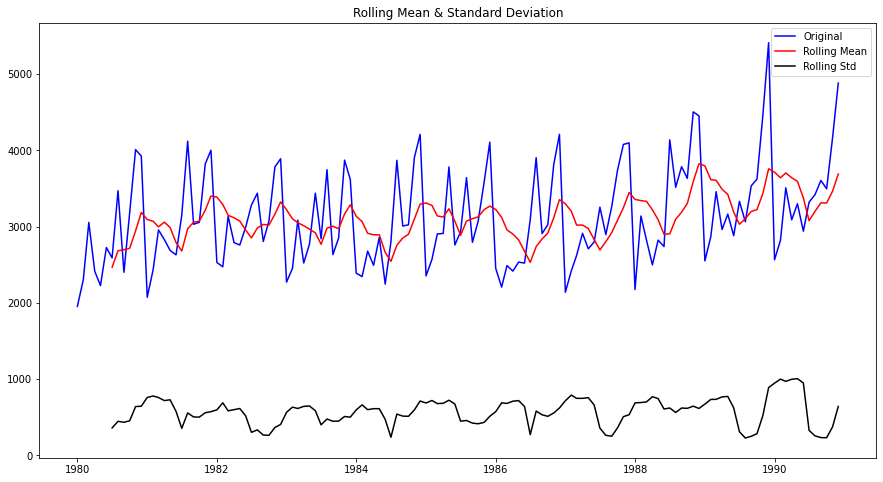

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [161]:
test_stationarity(Train['SoftDrinkProduction'])

we can observe that the series is not stationary at  𝛼  = 0.05.

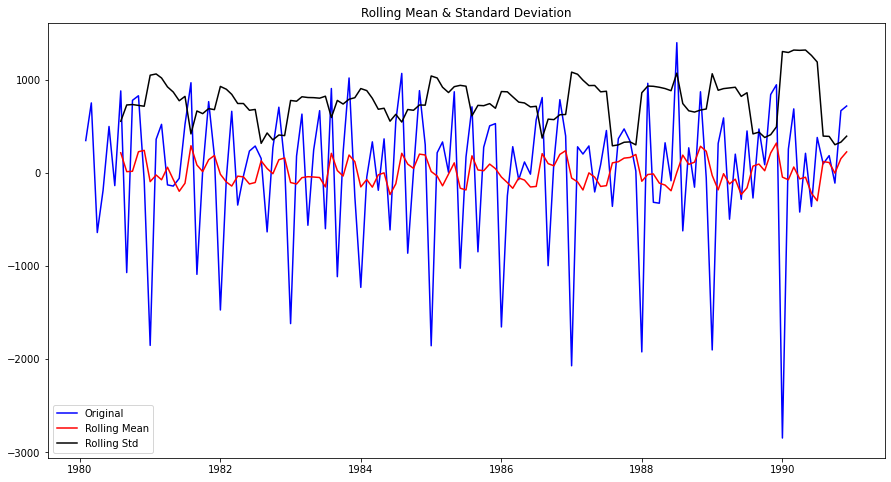

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [162]:
test_stationarity(Train['SoftDrinkProduction'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

If the series is non-stationary, stationarize it by taking a difference of the Time Series. Then, we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [163]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [164]:
Train.shape

(132, 1)

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data is having seasonality. So, ideally we should build the SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [165]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


Here, we got the combination of different parameters of p and q in the range of 0 and 2. We can take the value of d as 1, because we need to take a difference of the series to make it stationary.

In [166]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

we are passing the values to model with the values of train data of soft drink sales and order as param in which it takes the p,d,q combinations we got from the itertools and calculate the AIC.

In [167]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302115227
ARIMA(0, 1, 2) - AIC:2056.4892632434817
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083927102
ARIMA(1, 1, 2) - AIC:2056.7156820689142
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.1006718140716
ARIMA(2, 1, 2) - AIC:2058.712702099906


In [168]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  2056.489263
5  (1, 1, 2)  2056.715682
8  (2, 1, 2)  2058.712702
7  (2, 1, 1)  2059.100672
4  (1, 1, 1)  2061.523084
1  (0, 1, 1)  2069.599630
6  (2, 1, 0)  2073.234861
3  (1, 1, 0)  2097.872122
0  (0, 1, 0)  2103.733834

After sorting the values I'm choosing  (0,1,2) with AIC = 2056.489263. we can now pass these parameters and see the statistical summary.

In [169]:
arima = ARIMA(Train['SoftDrinkProduction'], order=(0,1,2))

results_Arima = arima.fit()

print(results_Arima.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Sun, 03 Apr 2022   AIC                           2056.489
Time:                         18:33:25   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

In [170]:
# From the summary, AIC = 2056.489 & P-value of ar and ms < 0.05.

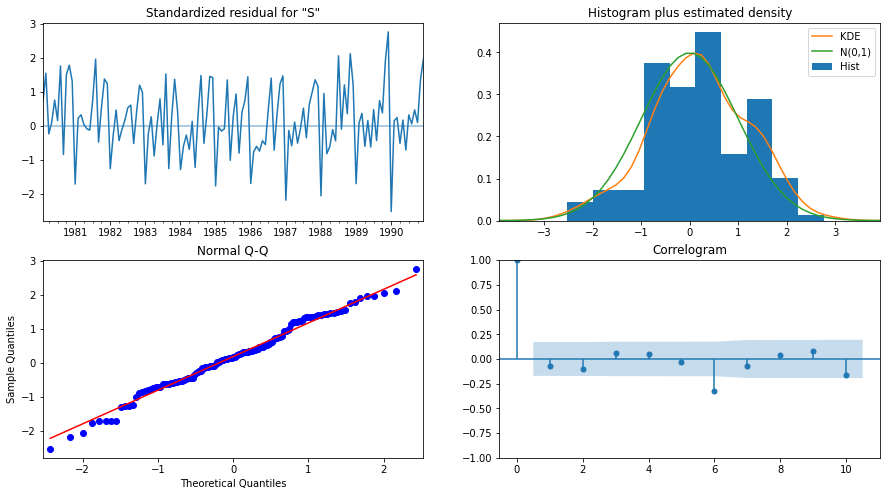

In [171]:
results_Arima.plot_diagnostics();

In [172]:
predicted_autoARIMA = results_Arima.forecast(steps=len(Test))
predicted_autoARIMA

1991-01-01    3931.418226
1991-02-01    3471.550571
1991-03-01    3471.550571
1991-04-01    3471.550571
1991-05-01    3471.550571
1991-06-01    3471.550571
1991-07-01    3471.550571
1991-08-01    3471.550571
1991-09-01    3471.550571
1991-10-01    3471.550571
1991-11-01    3471.550571
1991-12-01    3471.550571
1992-01-01    3471.550571
1992-02-01    3471.550571
1992-03-01    3471.550571
1992-04-01    3471.550571
1992-05-01    3471.550571
1992-06-01    3471.550571
1992-07-01    3471.550571
1992-08-01    3471.550571
1992-09-01    3471.550571
1992-10-01    3471.550571
1992-11-01    3471.550571
1992-12-01    3471.550571
1993-01-01    3471.550571
1993-02-01    3471.550571
1993-03-01    3471.550571
1993-04-01    3471.550571
1993-05-01    3471.550571
1993-06-01    3471.550571
1993-07-01    3471.550571
1993-08-01    3471.550571
1993-09-01    3471.550571
1993-10-01    3471.550571
1993-11-01    3471.550571
1993-12-01    3471.550571
1994-01-01    3471.550571
1994-02-01    3471.550571
1994-03-01  

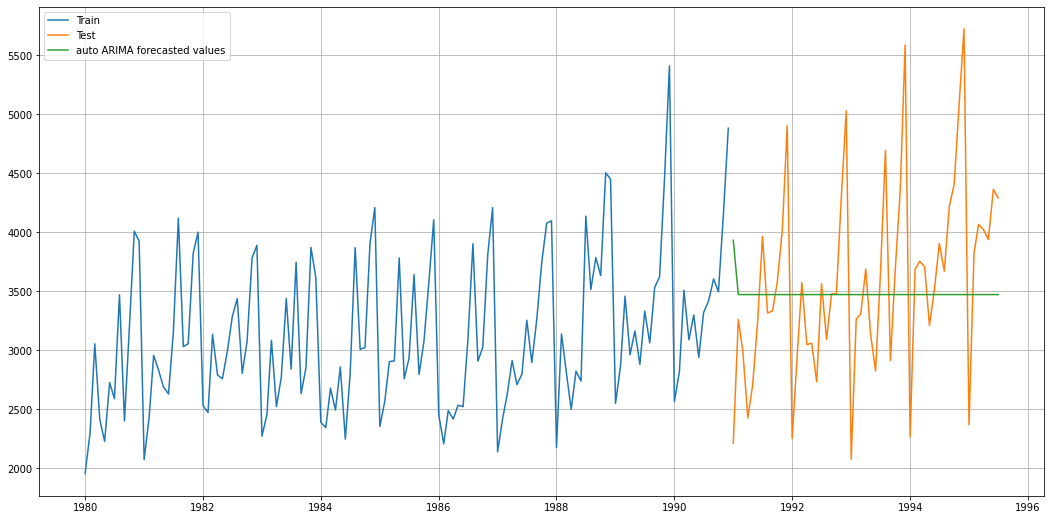

In [173]:
plt.figure(figsize=(18,9))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(predicted_autoARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [174]:
from sklearn.metrics import mean_squared_error

In [175]:
RMSE_autoARIMA = mean_squared_error(Test['SoftDrinkProduction'],predicted_autoARIMA,squared=False)
print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA)

RMSE for the autofit ARIMA model: 831.6158500856835


In [176]:
results_df11 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA]}
                           ,index=['automated ARIMA(0,1,2)'])

results_df = pd.concat([results_df, results_df11])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850

#### Model:12 Automated SARIMA model with seasonality 6 & 12
Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

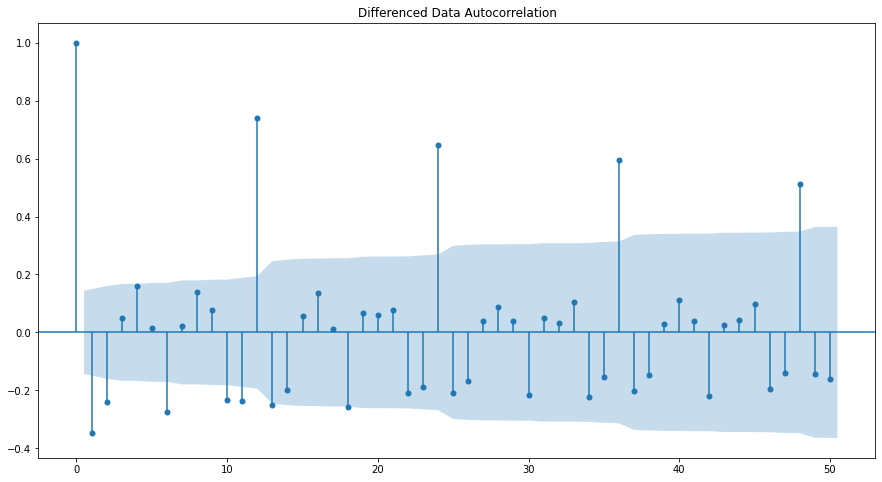

In [177]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

In [178]:
#Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [179]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [180]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911398415
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468102
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.0559370887202
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453341994
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.660005159761
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619744
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652727644
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907745
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.608241435247
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1785.2288259152044
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1952.5333036961945
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1856.5216278851053
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1747.652212599272
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1748.724256777991
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1750.3434719370794
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1698.8469671427329
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

We are passing the pdq values for the param and Train values of Shoe sales to the SARIMAX and fitting the model and calculating the AIC values.

So it is difficult to search for lowest AIC value, we sort the values w.r.t AIC.

In [182]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1686.172022
53  (1, 1, 2)  (2, 0, 2, 6)  1688.105594
80  (2, 1, 2)  (2, 0, 2, 6)  1689.372224
17  (0, 1, 1)  (2, 0, 2, 6)  1698.846967
44  (1, 1, 1)  (2, 0, 2, 6)  1700.331864

After sorting, the combination (0, 1, 2) (2, 0, 2, 6) have less AIC = 1686.172022.

Now we will build a model using this combination of values and check the RMSE values.

In [183]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -836.086
Date:                           Sun, 03 Apr 2022   AIC                           1686.172
Time:                                   18:33:43   BIC                           1705.447
Sample:                                        0   HQIC                          1693.997
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7796      0.116     -6.725      0.000      -1.007      -0.552
ma.L2         -0.0866      0.094     -0.926

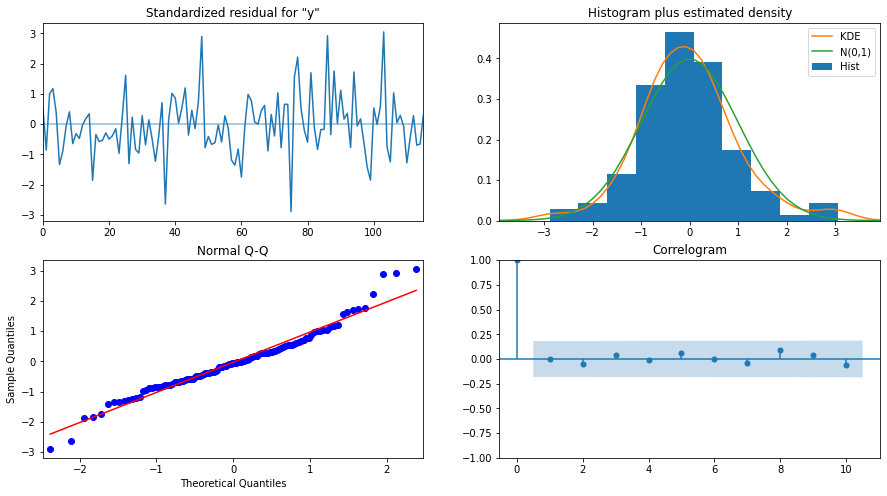

In [184]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [185]:
#Predict on the Test Set using this model and evaluate the model.

In [186]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(Test))

In [187]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2716.673970  318.172396    2093.067532    3340.280407
1  3110.199714  325.816233    2471.611631    3748.787796
2  3344.806215  328.585028    2700.791394    3988.821035
3  3103.976723  331.330127    2454.581607    3753.371840
4  3290.402851  334.053454    2635.670113    3945.135589

In [188]:
RMSE_autoSARIMA6 = mean_squared_error(Test['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA6)

RMSE for the autofit SARIMA model: 447.94274294699886


In [189]:
results_df12 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA6]}
                           ,index=['automatedSARIMA(0,1,2)(2,0,2,6)'])


results_df = pd.concat([results_df,results_df12])

results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [190]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [191]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [192]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.22009377062
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793653619
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238899301
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481342
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283979722
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553857
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907745
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843262
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750548733
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.982475585038
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.799731103561
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.691431559317
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994170982
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.2120753961963
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.253665927635
SARIMA(0, 1, 2)x(0

In [193]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 12)  1517.207903
23  (0, 1, 2)  (1, 0, 2, 12)  1518.229381
53  (1, 1, 2)  (2, 0, 2, 12)  1518.328978
50  (1, 1, 2)  (1, 0, 2, 12)  1519.197012
80  (2, 1, 2)  (2, 0, 2, 12)  1520.313657

After sorting, the combination (0, 1, 2) (2, 0, 2, 12) have less AIC = 1517.207903

Now we will build a model using this combination of values and check the RMSE values.

In [194]:
import statsmodels.api as sm

sarima = sm.tsa.statespace.SARIMAX(Train['SoftDrinkProduction'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Sun, 03 Apr 2022   AIC                           1517.208
Time:                                    18:34:09   BIC                           1535.719
Sample:                                01-01-1980   HQIC                          1524.707
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

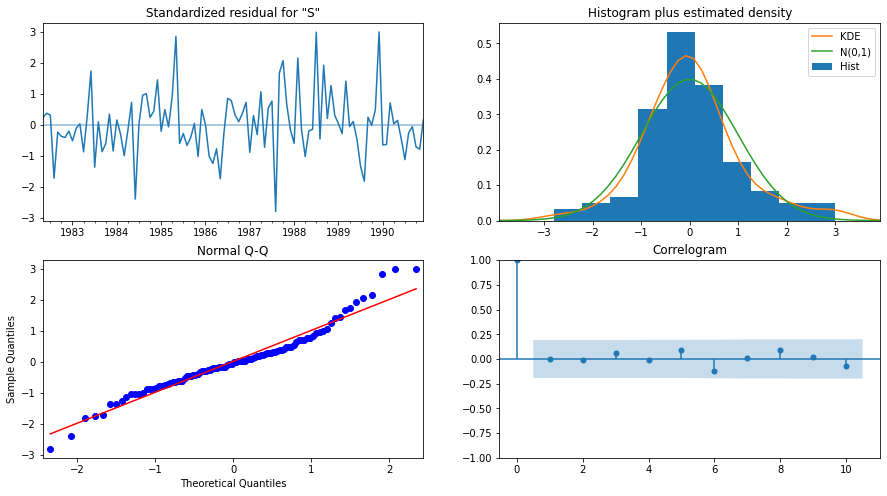

In [195]:
results_SARIMA.plot_diagnostics();

In [196]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(Test))
predicted_autoSARIMA

1991-01-01    2657.024978
1991-02-01    2979.306642
1991-03-01    3404.286397
1991-04-01    3086.458755
1991-05-01    3284.532786
1991-06-01    3041.225969
1991-07-01    3570.924708
1991-08-01    3531.521216
1991-09-01    3663.739102
1991-10-01    3680.018043
1991-11-01    4380.372400
1991-12-01    4914.341752
1992-01-01    2734.060541
1992-02-01    3055.709353
1992-03-01    3475.287383
1992-04-01    3161.436986
1992-05-01    3356.996359
1992-06-01    3116.957331
1992-07-01    3640.502666
1992-08-01    3600.597080
1992-09-01    3731.789874
1992-10-01    3749.017947
1992-11-01    4441.589415
1992-12-01    4969.643894
1993-01-01    2812.937006
1993-02-01    3130.962749
1993-03-01    3545.944072
1993-04-01    3235.555795
1993-05-01    3428.971581
1993-06-01    3191.495838
1993-07-01    3709.085659
1993-08-01    3669.997739
1993-09-01    3799.504581
1993-10-01    3816.105348
1993-11-01    4500.664809
1993-12-01    5022.603292
1994-01-01    2891.094212
1994-02-01    3205.459304
1994-03-01  

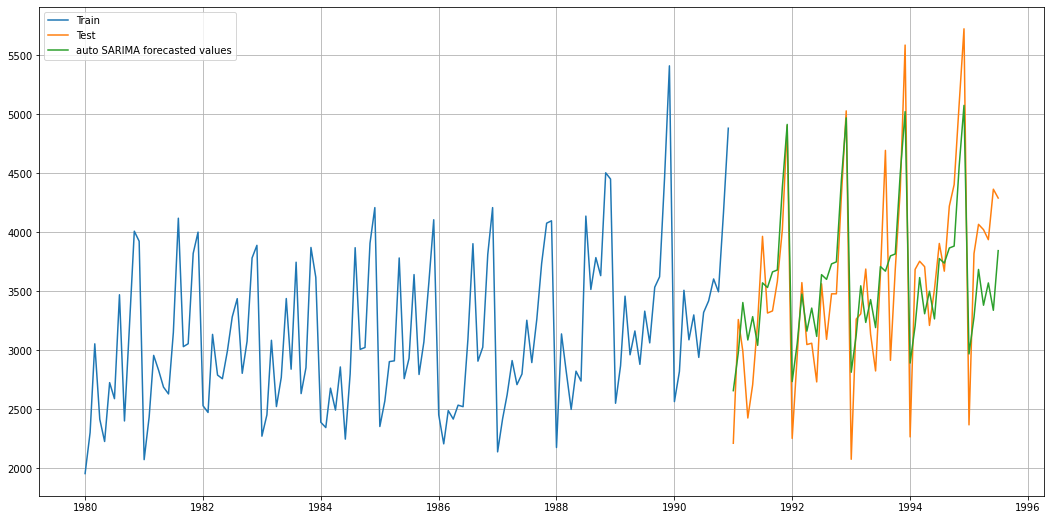

In [197]:
plt.figure(figsize=(18,9))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(predicted_autoSARIMA, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [198]:
RMSE_autoSARIMA = mean_squared_error(Test['SoftDrinkProduction'],predicted_autoSARIMA,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA)

RMSE for the autofit SARIMA model: 437.70656001343895


In [199]:
results_df13 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA]}
                           ,index=['automated SARIMA(0,1,2)*(2,0,2,12)'])

results_df = pd.concat([results_df, results_df13])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743
automated SARIMA(0,1,2)*(2,0,2,12)                   437.706560

We can observe that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Model13: Manual ARIMA with cut-off values from ACF and PACF graphs

In [200]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

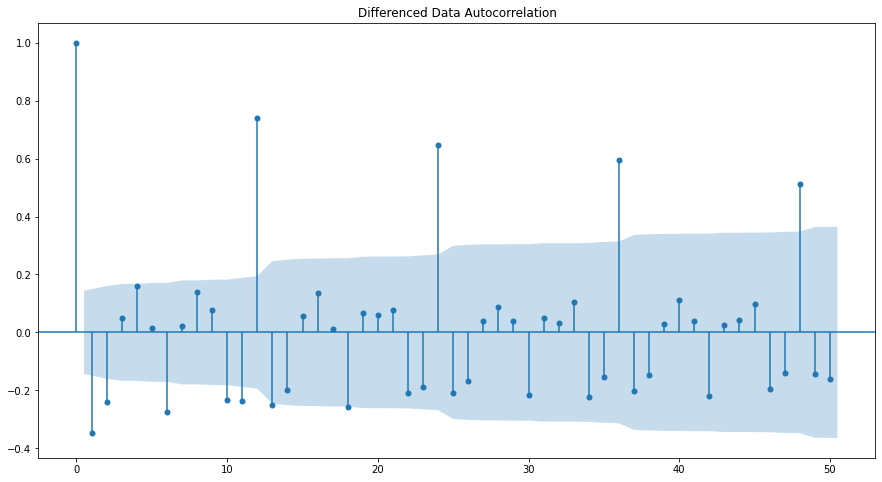

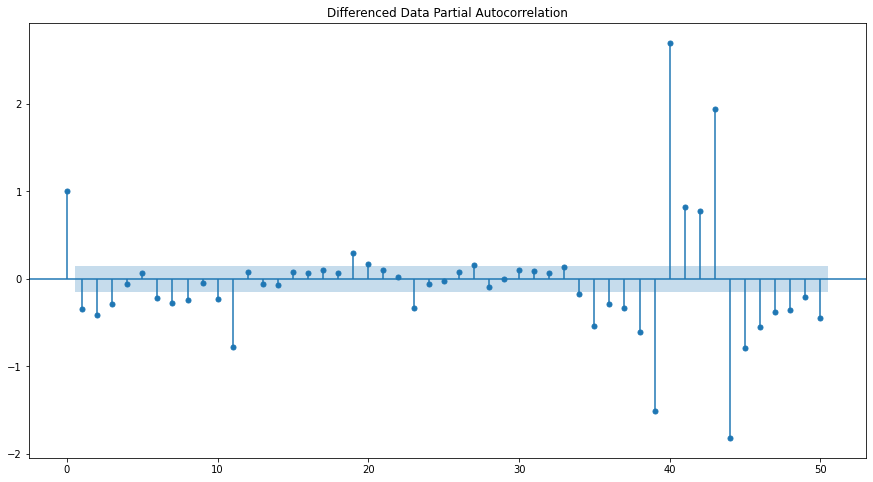

In [201]:
plot_acf(df['SoftDrinkProduction'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

For alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p'  from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' from the significant lag before the ACF plot cuts-off to 0.

From above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [202]:
manual_ARIMA = ARIMA(Train['SoftDrinkProduction'], order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Sun, 03 Apr 2022   AIC                           2060.680
Time:                         18:34:11   BIC                           2077.931
Sample:                     01-01-1980   HQIC                          2067.690
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

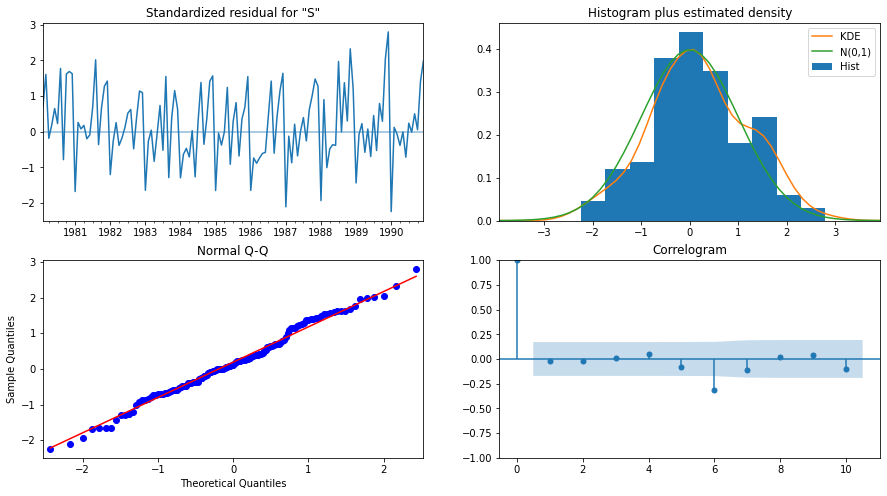

In [203]:
results_manual_ARIMA.plot_diagnostics();

In [204]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Test))

In [205]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Test))
predicted_manual_ARIMA

1991-01-01    3808.666169
1991-02-01    3383.977217
1991-03-01    3504.365083
1991-04-01    3490.112324
1991-05-01    3504.337756
1991-06-01    3497.026681
1991-07-01    3499.700286
1991-08-01    3498.517886
1991-09-01    3499.064072
1991-10-01    3498.827765
1991-11-01    3498.930582
1991-12-01    3498.885125
1992-01-01    3498.905105
1992-02-01    3498.896347
1992-03-01    3498.900195
1992-04-01    3498.898504
1992-05-01    3498.899246
1992-06-01    3498.898920
1992-07-01    3498.899063
1992-08-01    3498.899001
1992-09-01    3498.899028
1992-10-01    3498.899016
1992-11-01    3498.899021
1992-12-01    3498.899019
1993-01-01    3498.899020
1993-02-01    3498.899020
1993-03-01    3498.899020
1993-04-01    3498.899020
1993-05-01    3498.899020
1993-06-01    3498.899020
1993-07-01    3498.899020
1993-08-01    3498.899020
1993-09-01    3498.899020
1993-10-01    3498.899020
1993-11-01    3498.899020
1993-12-01    3498.899020
1994-01-01    3498.899020
1994-02-01    3498.899020
1994-03-01  

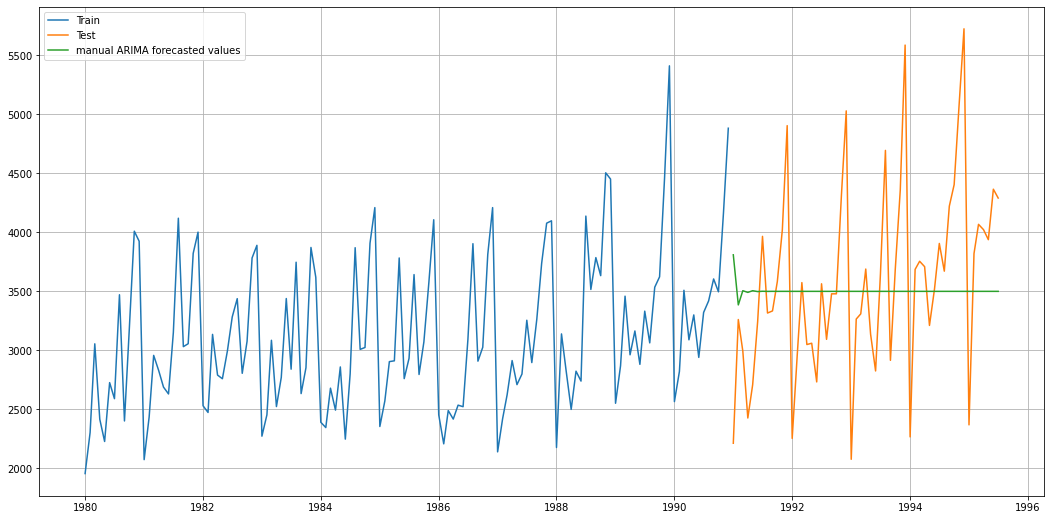

In [206]:
plt.figure(figsize=(18,9))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(predicted_manual_ARIMA, label='manual ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
RMSE_manual_ARIMA = mean_squared_error(Test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA)

RMSE for the manual ARIMA model: 822.2174069221138


In [209]:
results_df14 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA]}
                           ,index=['manual ARIMA(3,1,2)'])

results_df = pd.concat([results_df, results_df14])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743
automated SARIMA(0,1,2)*(2,0,2,12)                   437.706560
manual ARIMA(3,1,2)                                  822.217407

#### Model14: manual SARIMA

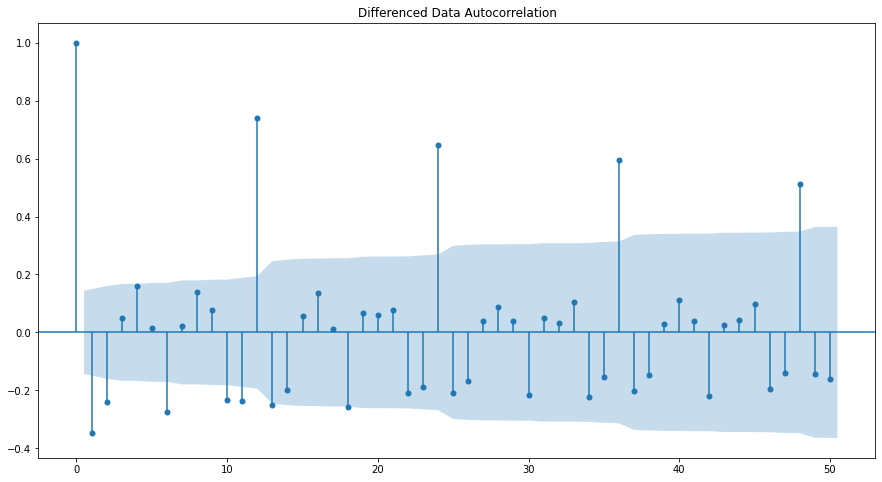

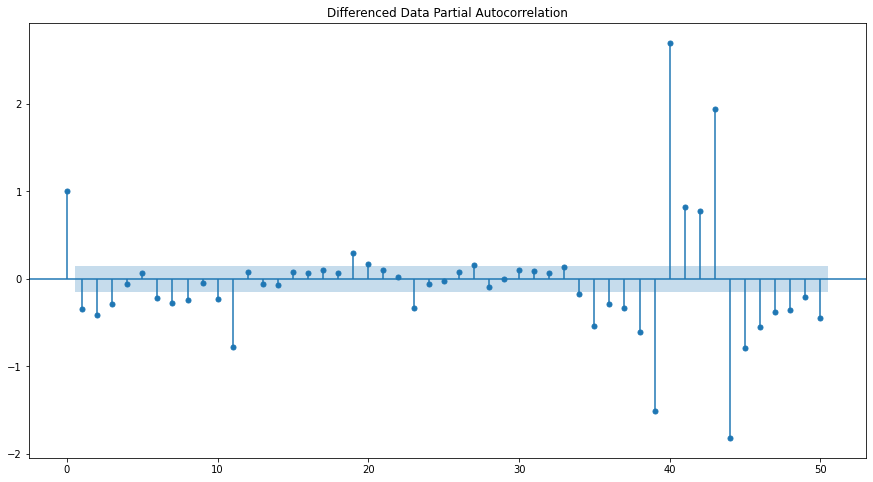

In [210]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

We can observe that the above ACF plot at the seasonal interval (6) does not taper off. 

Hence, we are taking a seasonal differencing of original series.

In [211]:
# Before that let us look at the original series.

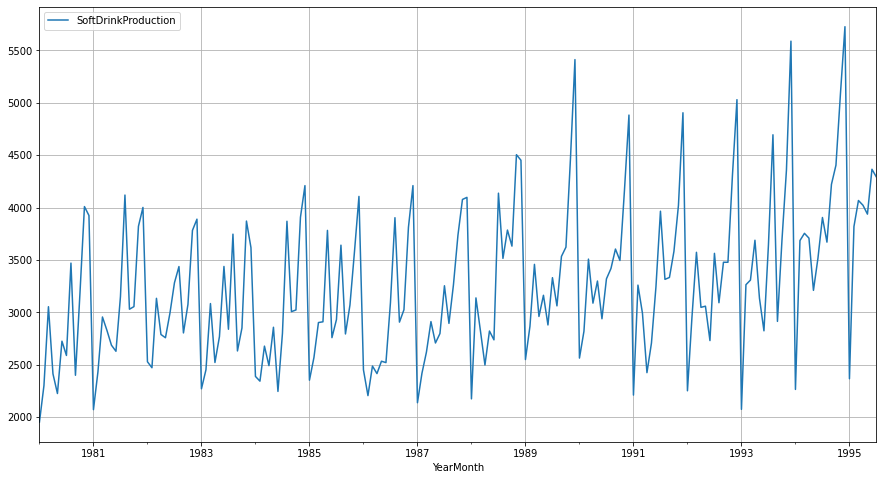

In [212]:
df.plot()
plt.grid();

Here, We can observe that there is a trend and a seasonality. So, we can take a seasonal differencing and check the series.

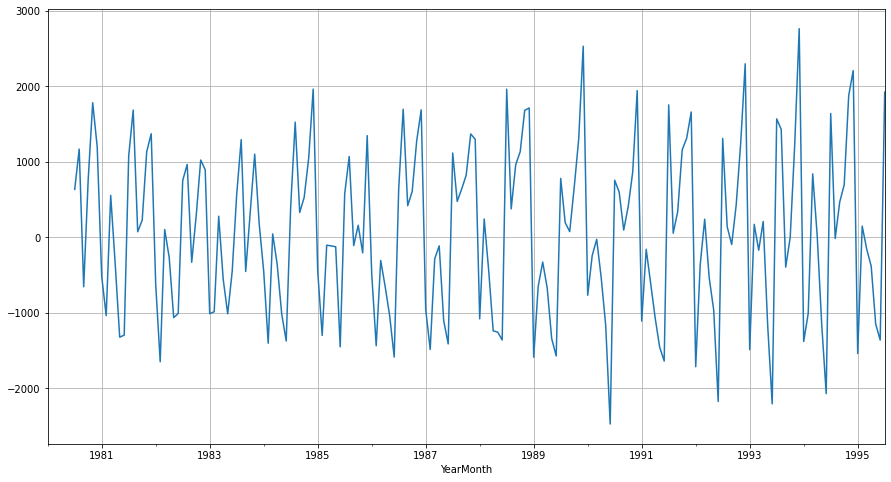

In [213]:
(df['SoftDrinkProduction'].diff(6)).plot()
plt.grid();

There is a slight trend which we can observe in the data. So, we take a differencing of first order on the seasonally differenced series.

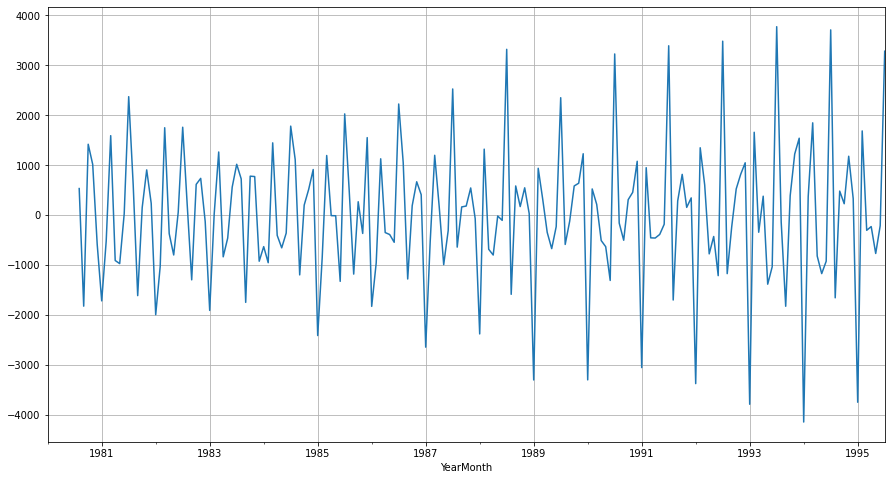

In [214]:
(df['SoftDrinkProduction'].diff(6)).diff().plot()
plt.grid();

Here, There is almost no trend present in the data. Only the seasonality is present in the data.

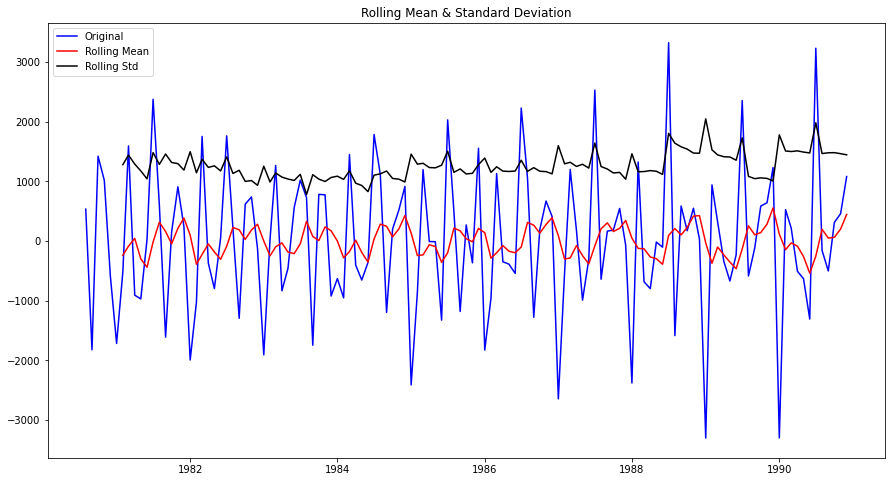

Results of Dickey-Fuller Test:
Test Statistic                -7.167226e+00
p-value                        2.865418e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64 



In [215]:
#check the stationarity of the above series before fitting the SARIMA model.
test_stationarity((Train.diff(6).dropna()).diff(1).dropna())

In [216]:
# Check the ACF and the PACF plots for the new modified Time Series.

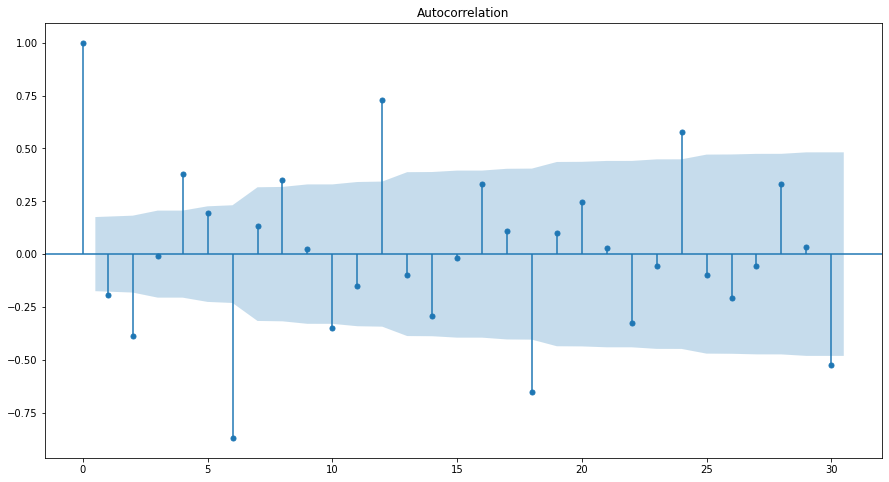

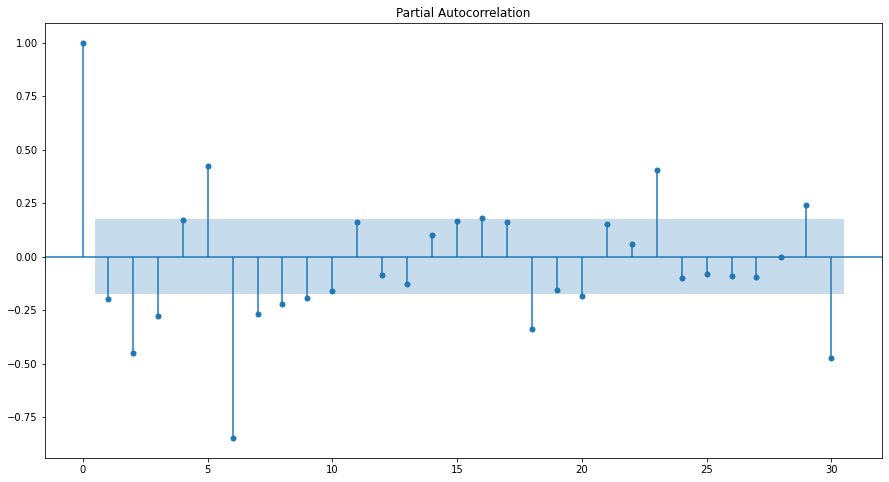

In [217]:
plot_acf((Train.diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((Train.diff(6).dropna()).diff(1).dropna(),lags=30);

In [218]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train.values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -790.890
Date:                                   Sun, 03 Apr 2022   AIC                           1591.780
Time:                                           18:34:13   BIC                           1605.098
Sample:                                                0   HQIC                          1597.178
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9773      0.026    -37.900      0.000    

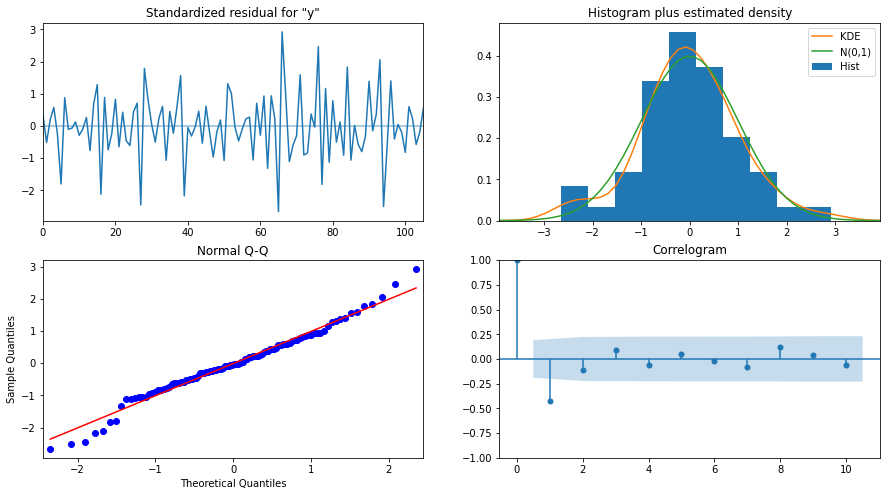

In [219]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [220]:
# Predict on the Test Set using this model and evaluate the model

In [221]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(Test))
predicted_manual_SARIMA

array([2699.45013997, 3039.54421884, 3407.91702693, 3121.31119147,
       3348.4197238 , 3027.65243853, 3512.20526785, 3483.56750488,
       3633.52567894, 3641.76842203, 4340.22802006, 4914.05701732,
       2787.16866311, 3122.48479998, 3487.25699131, 3203.88249857,
       3440.5770243 , 3143.52129432, 3568.71449645, 3548.34962431,
       3703.19065006, 3704.80475815, 4392.76815863, 4946.80142277,
       2877.92341576, 3205.15470959, 3565.15503938, 3288.25850878,
       3535.21064717, 3257.5006814 , 3626.00214639, 3613.53834396,
       3773.04276395, 3768.32615789, 4446.2651074 , 4981.39234817,
       2967.91744106, 3287.42726124, 3642.87019854, 3372.16048116,
       3628.90920873, 3369.67552106, 3684.0332319 , 3679.11538937,
       3843.07360959, 3832.31082028, 4500.67586298, 5017.74680256,
       3057.18492953, 3369.320314  , 3720.41068863, 3455.60972112,
       3721.71473485, 3480.1269178 , 3742.77433961])

In [222]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA, index=Test.index, columns=Test.columns)
predicted_manual_SARIMA_date

SoftDrinkProduction
YearMonth                      
1991-01-01          2699.450140
1991-02-01          3039.544219
1991-03-01          3407.917027
1991-04-01          3121.311191
1991-05-01          3348.419724
1991-06-01          3027.652439
1991-07-01          3512.205268
1991-08-01          3483.567505
1991-09-01          3633.525679
1991-10-01          3641.768422
1991-11-01          4340.228020
1991-12-01          4914.057017
1992-01-01          2787.168663
1992-02-01          3122.484800
1992-03-01          3487.256991
1992-04-01          3203.882499
1992-05-01          3440.577024
1992-06-01          3143.521294
1992-07-01          3568.714496
1992-08-01          3548.349624
1992-09-01          3703.190650
1992-10-01          3704.804758
1992-11-01          4392.768159
1992-12-01          4946.801423
1993-01-01          2877.923416
1993-02-01          3205.154710
1993-03-01          3565.155039
1993-04-01          3288.258509
1993-05-01          3535.210647
1993-06-01          3257.500681
1993-07-01          3626.002146
1993-08-01          3613.538344
1993-09-01          3773.042764
1993-10-01          3768.326158
1993-11-01          4446.265107
1993-12-01          4981.392348
1994-01-01          2967.917441
1994-02-01          3287.427261
1994-03-01          3642.870199
1994-04-01          3372.160481
1994-05-01          3628.909209
1994-06-01          3369.675521
1994-07-01          3684.033232
1994-08-01          3679.115389
1994-09-01          3843.073610
1994-10-01          3832.310820
1994-11-01          4500.675863
1994-12-01          5017.746803
1995-01-01          3057.184930
1995-02-01          3369.320314
1995-03-01          3720.410689
1995-04-01          3455.609721
1995-05-01          3721.714735
1995-06-01          3480.126918
1995-07-01          3742.774340

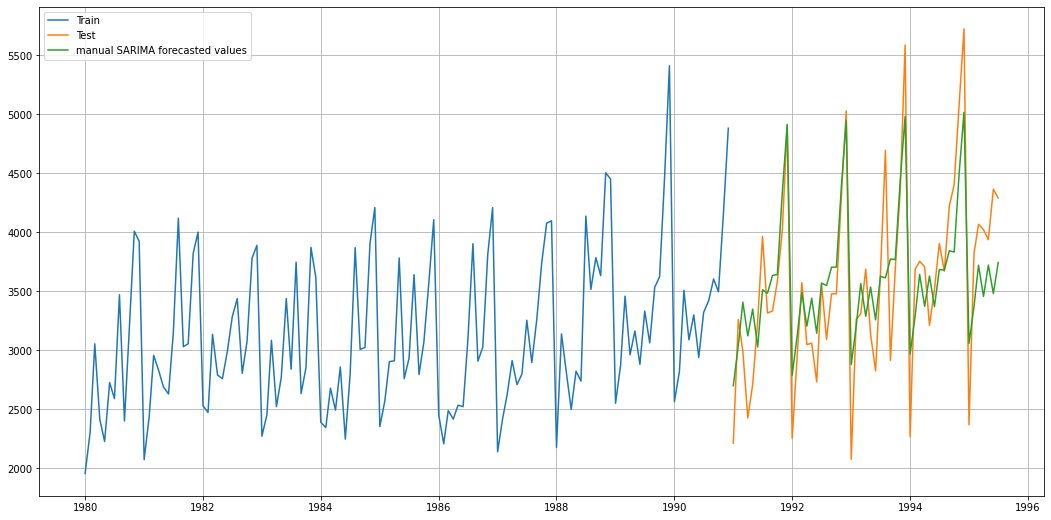

In [223]:
plt.figure(figsize=(18,9))
plt.plot(Train['SoftDrinkProduction'], label='Train')
plt.plot(Test['SoftDrinkProduction'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [224]:
from sklearn.metrics import mean_squared_error

In [225]:
RMSE_manual_SARIMA = mean_squared_error(Test['SoftDrinkProduction'],predicted_manual_SARIMA,squared=False)
print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA)

RMSE for the manual SARIMA model: 445.42649206281226


In [226]:
results_df15 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA]}
                           ,index=['manual SARIMA(0,1,0)(1,1,3,6)'])

results_df = pd.concat([results_df, results_df15])
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743
automated SARIMA(0,1,2)*(2,0,2,12)                   437.706560
manual ARIMA(3,1,2)                                  822.217407
manual SARIMA(0,1,0)(1,1,3,6)                        445.426492

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [227]:
results_df

Test RMSE
RegressionOnTime                                     898.172528
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated ARIMA(0,1,2)                               831.615850
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743
automated SARIMA(0,1,2)*(2,0,2,12)                   437.706560
manual ARIMA(3,1,2)                                  822.217407
manual SARIMA(0,1,0)(1,1,3,6)                        445.426492

In [228]:
results_df.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE
Alpha=0.4,Beta=0.4,Gamma=0.4,TripleExponentialS...   427.331067
automated SARIMA(0,1,2)*(2,0,2,12)                   437.706560
manual SARIMA(0,1,0)(1,1,3,6)                        445.426492
automatedSARIMA(0,1,2)(2,0,2,6)                      447.942743
Alpha=0.11,Beta=0.04,Gamma=0.39,TripleExponenti...   460.437728
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.1,SimpleExponentialSmoothing                 807.346881
manual ARIMA(3,1,2)                                  822.217407
automated ARIMA(0,1,2)                               831.615850
Alpha=0.216,SimpleExponentialSmoothing               847.635259
RegressionOnTime                                     898.172528
SimpleAverageModel                                   934.353358
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        985.423307
NaiveModel                                          1519.259233
Alpha=0.39 and Beta=0,DoubleExponentialSmoothing    2301.542724

Alpha=0.4,Beta=0.4,Gamma=0.4, TripleExponentialSmoothing is the best optimised model with the least RMSE value.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [229]:
final_model = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative',freq='MS').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.4,
                                                                 smoothing_seasonal=0.4)

In [230]:
RMSE_final_model = metrics.mean_squared_error(df['SoftDrinkProduction'],final_model.fittedvalues,squared=False)

print('RMSE:',RMSE_final_model)

RMSE: 672.6828581062896


In [231]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = final_model.forecast(steps=len(Test))

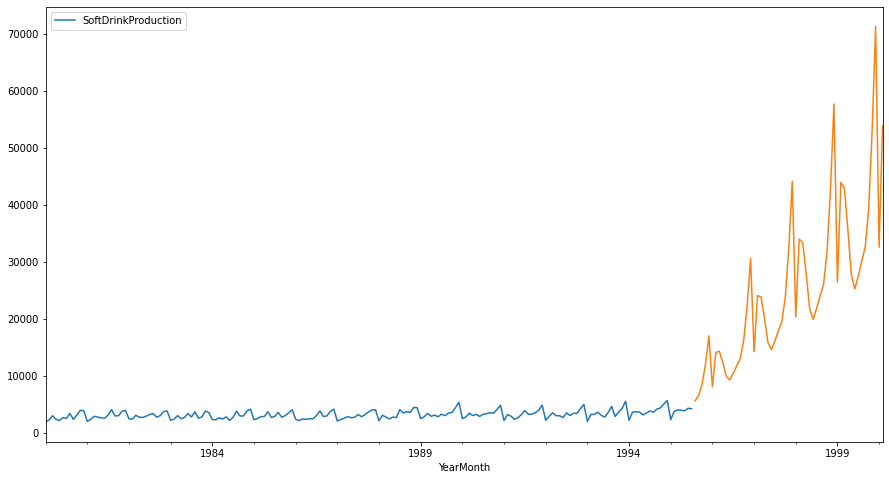

In [232]:
df.plot()
prediction.plot();

We assume that while calculating the confidence bands, the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [233]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
prediction_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(final_model.resid,ddof=1)})
prediction_df.head()

lower_CI    prediction      upper_ci
1995-08-01   4339.555941   5661.546954   6983.537966
1995-09-01   5235.539508   6557.530521   7879.521534
1995-10-01   7121.179397   8443.170409   9765.161422
1995-11-01  10707.951881  12029.942894  13351.933906
1995-12-01  15719.140912  17041.131925  18363.122937

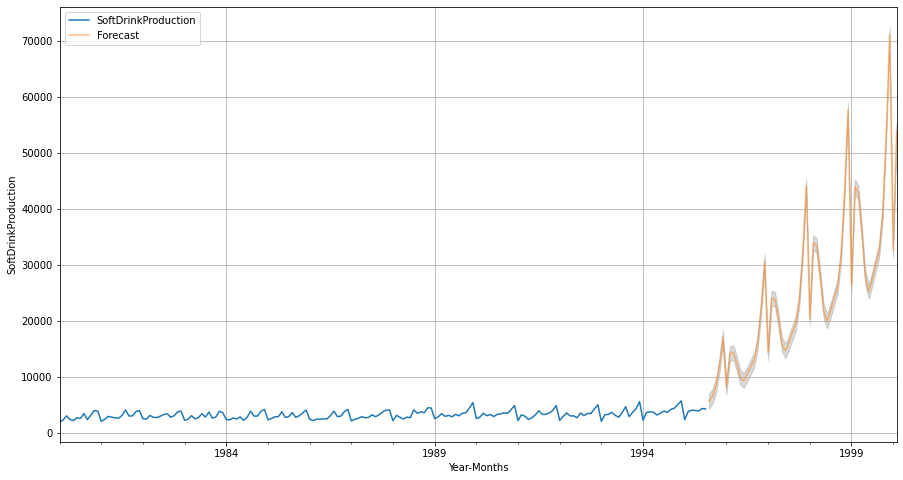

In [234]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(prediction_df.index, prediction_df['lower_CI'], prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid()
plt.show()

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

Any time series may be split into the following components:
Base Level + Trend + Seasonality + Error

Observations:

The Softdrink production dataset is having both trend and seasonality.

The  sales shows stabilized values.

December month shows the highest sales.

The sales of Softdrink is seasonal and also had trend. Therefore, the company cannot have the same stock throughout the year.

The models are built and are chosen based on the least RMSE score.

Insights and Recommendations:
    
The models are built considering the Trend and Seasonality into account and we can see from the output plot that the future prediction is in line with the trend and seasonality in the previous years.

1.The company should use the prediction results and capitalize on the high demand seasons and ensure to source and supply the high demand.

2.The company need to focus on the low demand seasons and can introduce new plans to improve the sales such as Discounts sales & Seasonal memberships. 

3.Products that are discounted should be highlighted. So that the consumers can see the savings prominently and the discounts can compel consumers to buy.

4.The Company has to create a dynamic consumer experience with fresh point-of-sale materials and well stocked displays. 

5.Seasonal memberships and discounts can be introduced. Many prominent retailers also have loyalty programs that create excitement. 

6.Advertising events and excieting dicounts can help draw consumers to your store and generate sales. Retailers with economies of scale successfully sample consumers on more profitable Softdrink sales. 

7.Comparison of products with the national brands that are more expensive to demonstrate the company is offering a less expensive but superior product. And bringing in celebrities, sommeliers or trade reps for advertising and promotion campaigns can help create excitement and drive traffic.
